# Classification - Employee Attrition

### Classification project for IBM Machine Learning Professional Certificate

Dataset : IBM HR Analytics Employee Attrition and Performance
Link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.compose  import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, auc, roc_curve, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import balanced_accuracy_score

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

from yellowbrick.model_selection import LearningCurve
from yellowbrick.features import Rank2D
from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import ClassificationReport, ROCAUC, PrecisionRecallCurve, DiscriminationThreshold

from imblearn.over_sampling import ADASYN

### Import data

In [2]:
raw_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
eda = raw_data

### Discover data

In [4]:
eda.shape

(1470, 35)

In [5]:
pd.set_option('display.max_column',35)

In [6]:
eda

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [7]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Check missing values

In [8]:
# Display sum of null value per column
eda.isna().sum()

# Display sum of null value per column, sorted 
eda.isna().sum().sort_values(ascending = False)

YearsWithCurrManager        0
EmployeeCount               0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EmployeeNumber              0
EducationField              0
JobSatisfaction             0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
Attrition                   0
JobRole                     0
MaritalStatus               0
YearsSinceLastPromotion     0
StandardHours               0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
MonthlyIncome               0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
Over18                      0
NumCompaniesWorked          0
MonthlyRat

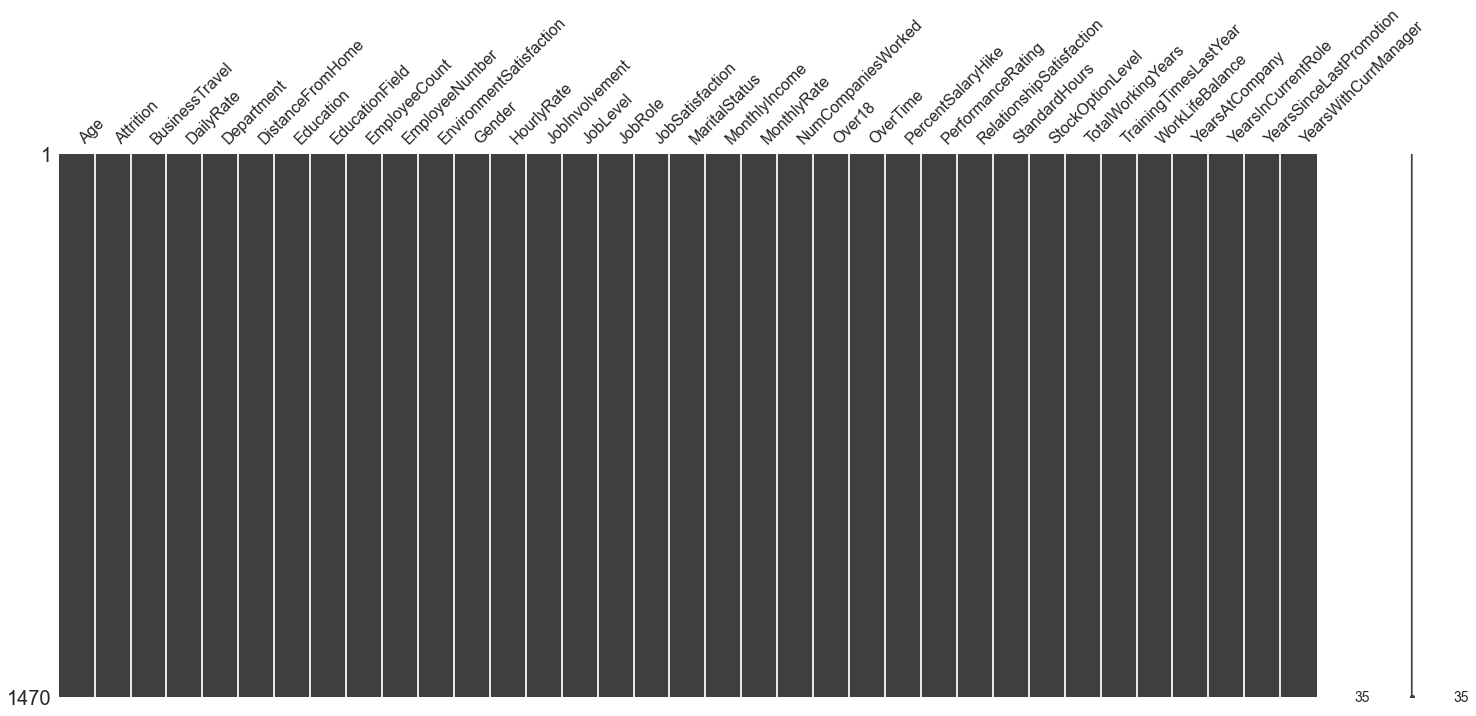

In [9]:
# Check missing values
ax = msno.matrix(eda.sample(1470))

### Features overview

In [10]:
# count number of feature by type
eda.dtypes.value_counts()

int64     26
object     9
dtype: int64

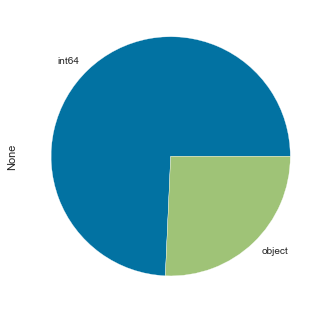

In [11]:
# Display number of feature by type in a pie chart
eda.dtypes.value_counts().plot.pie()

In [12]:
# List unique values for categorical columns
for col in eda.select_dtypes('object'):
    print(f'{col:-<30} {eda[col].unique()}')

Attrition--------------------- ['Yes' 'No']
BusinessTravel---------------- ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department-------------------- ['Sales' 'Research & Development' 'Human Resources']
EducationField---------------- ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender------------------------ ['Female' 'Male']
JobRole----------------------- ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus----------------- ['Single' 'Married' 'Divorced']
Over18------------------------ ['Y']
OverTime---------------------- ['Yes' 'No']


In [13]:
for i in eda: print("No of Values for {} is {}".format(i,str(eda[i].nunique())))

No of Values for Age is 43
No of Values for Attrition is 2
No of Values for BusinessTravel is 3
No of Values for DailyRate is 886
No of Values for Department is 3
No of Values for DistanceFromHome is 29
No of Values for Education is 5
No of Values for EducationField is 6
No of Values for EmployeeCount is 1
No of Values for EmployeeNumber is 1470
No of Values for EnvironmentSatisfaction is 4
No of Values for Gender is 2
No of Values for HourlyRate is 71
No of Values for JobInvolvement is 4
No of Values for JobLevel is 5
No of Values for JobRole is 9
No of Values for JobSatisfaction is 4
No of Values for MaritalStatus is 3
No of Values for MonthlyIncome is 1349
No of Values for MonthlyRate is 1427
No of Values for NumCompaniesWorked is 10
No of Values for Over18 is 1
No of Values for OverTime is 2
No of Values for PercentSalaryHike is 15
No of Values for PerformanceRating is 2
No of Values for RelationshipSatisfaction is 4
No of Values for StandardHours is 1
No of Values for StockOptionL

In [14]:
num_col=[]
for i in eda.columns:
    if(eda[i].dtypes!=object and eda[i].nunique()<30):
        print(i, eda[i].unique())
        num_col.append(i)

DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education [2 1 4 3 5]
EmployeeCount [1]
EnvironmentSatisfaction [2 3 4 1]
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobSatisfaction [4 2 3 1]
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StandardHours [80]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]
YearsInCurrentRole [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [15]:
# Count duplicate on a column
eda.EmployeeNumber.duplicated().sum()

0

### Drop unnecessary columns

In [16]:
# Drop uncessary columns for Data Exploration
# Drop columns "EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"
raw_data.drop(raw_data.columns[[8,9,21,26]], inplace=True, axis=1)

### Distribution of target variable

Text(0.5, 1.0, 'Attrition distribution')

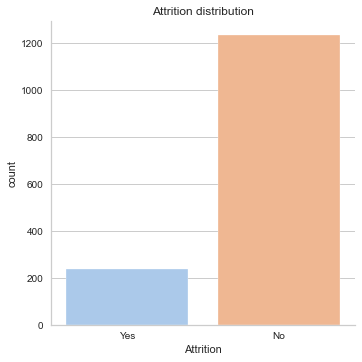

In [17]:
# Bar chart with Seaborn
sns.catplot(x="Attrition", data=eda, kind="count", palette="pastel")
plt.title('Attrition distribution')

In [18]:
# Percentage
eda['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

### Analysis of features

#### Statistics

In [19]:
# Descriptive statistics on numerical features
eda.describe().T.head(26)

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [20]:
# Information on categorical features
eda.describe(include='object').T.head(9)

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

In [21]:
# Split numerical and categorical data 
num_data = eda.select_dtypes(include=[np.number])
num_data.drop(columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'], inplace=True, axis=1)
ord_data = eda [['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]
cat_data = eda.select_dtypes(exclude=[np.number])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
num_data.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [23]:
cat_data.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-24-ecbf0c5e41b7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-24-ecbf0c5e41b7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-24-ecbf0c5e41b7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained unti

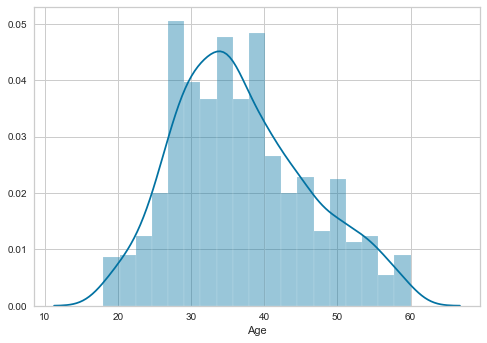

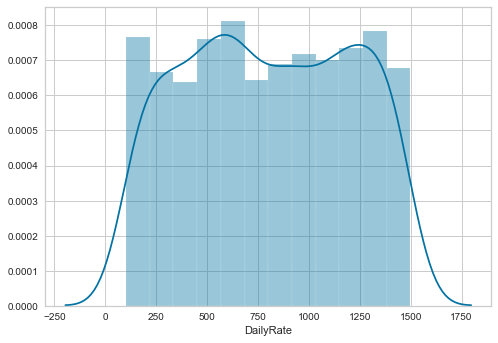

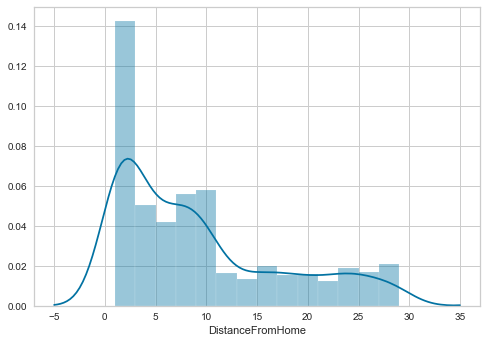

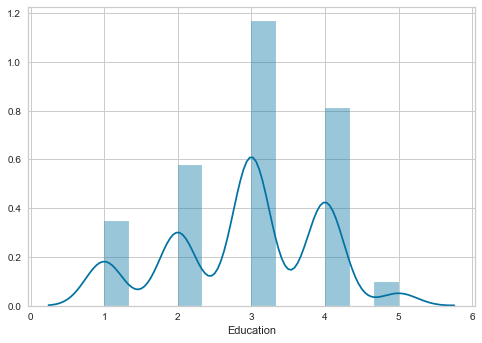

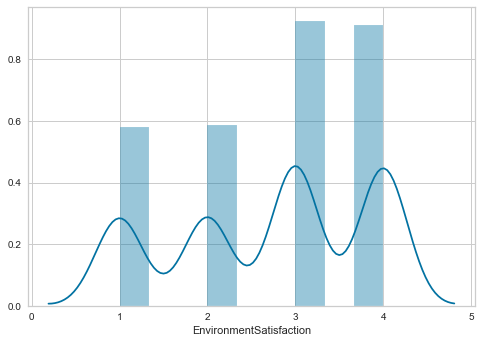

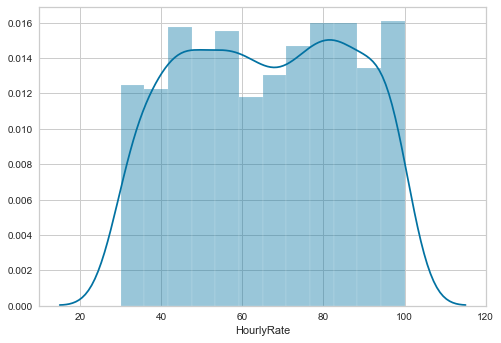

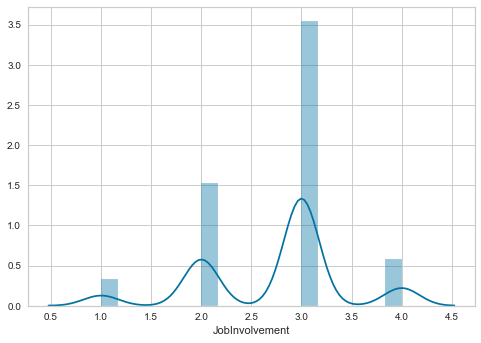

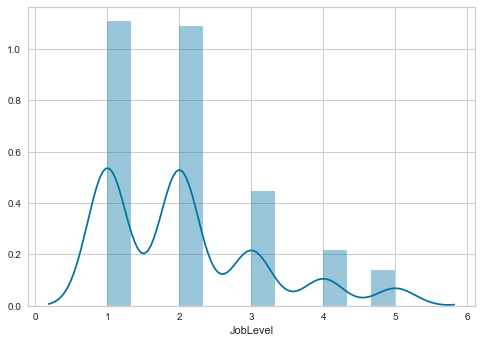

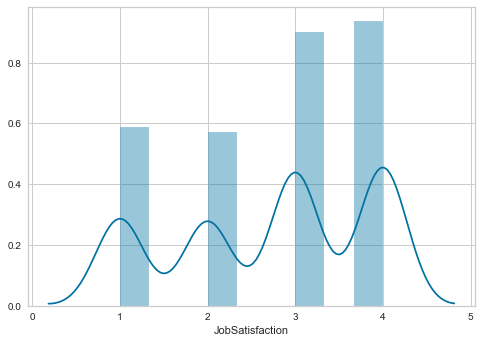

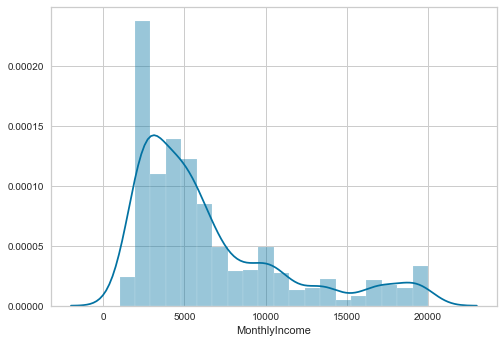

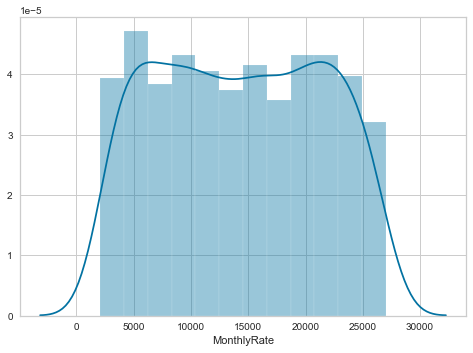

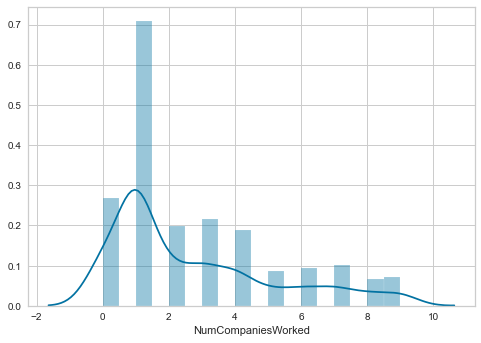

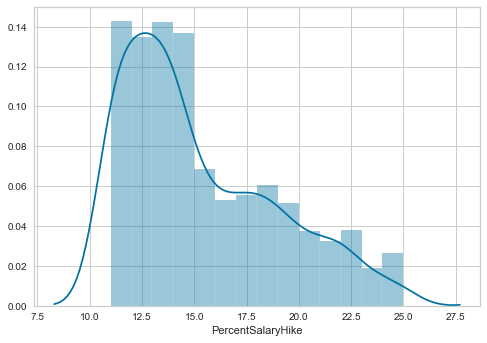

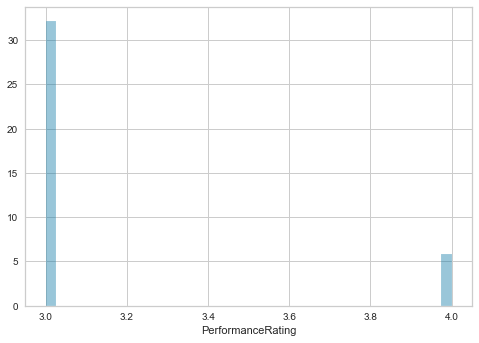

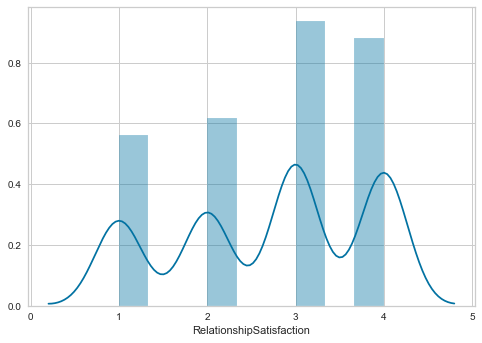

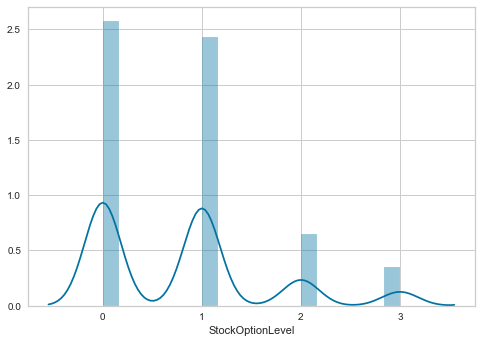

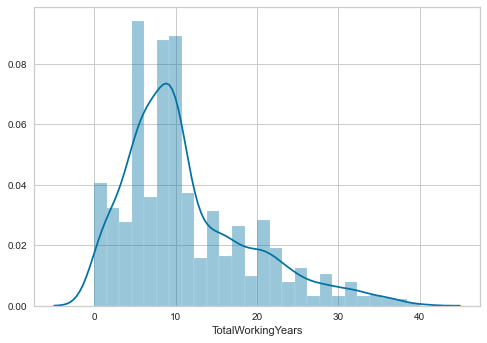

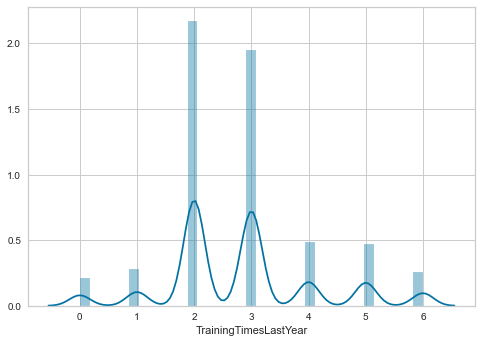

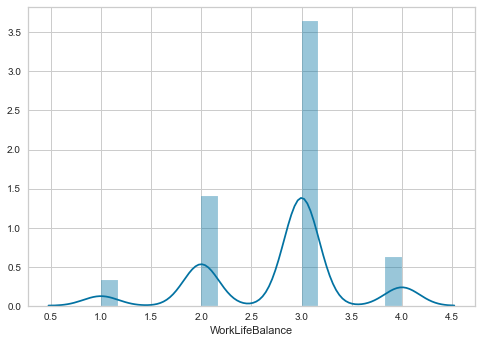

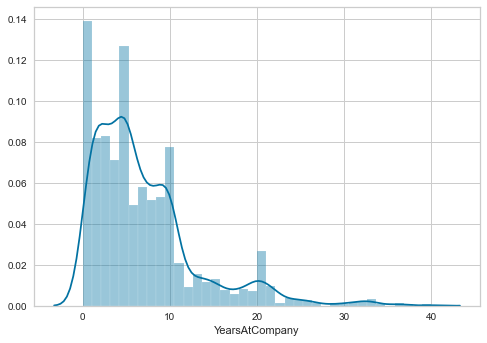

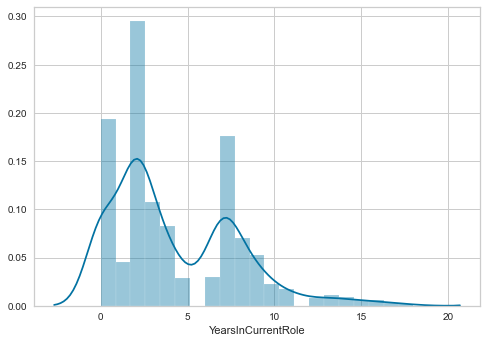

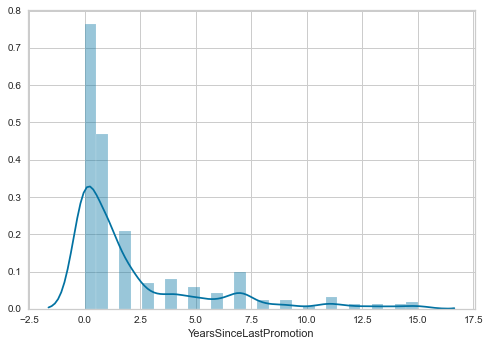

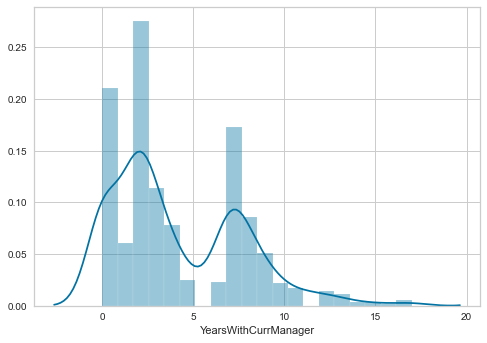

In [24]:
for col in eda.select_dtypes('int64'):
    plt.figure()
    sns.distplot(eda[col])

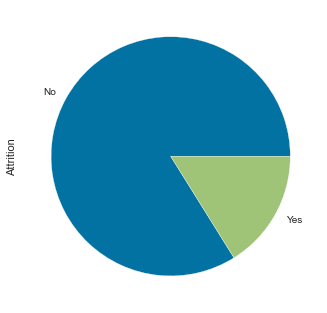

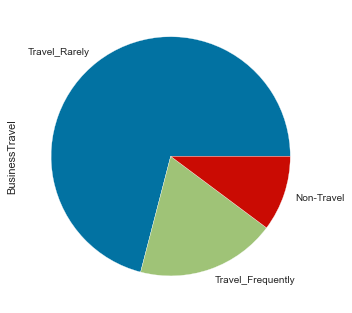

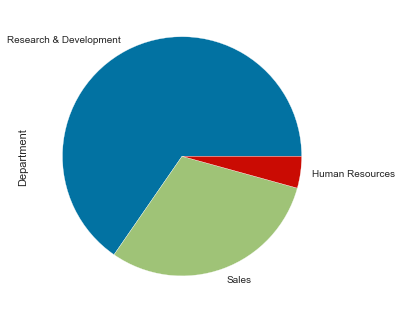

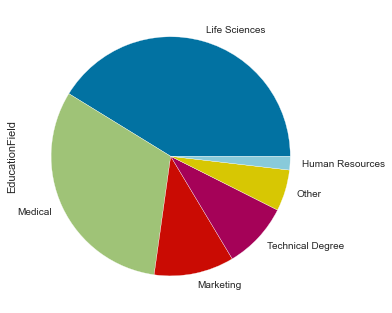

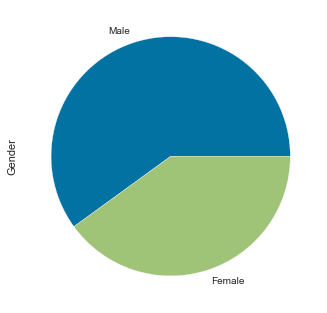

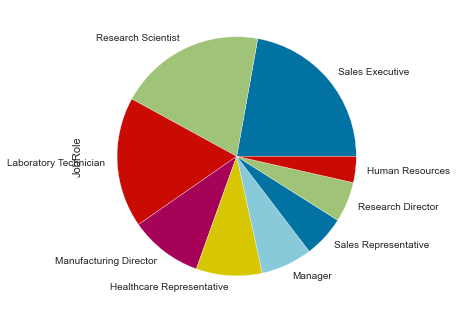

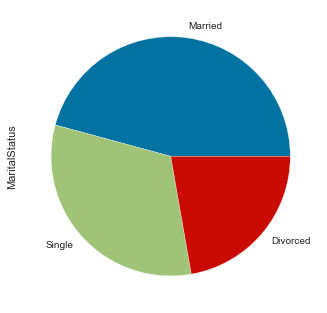

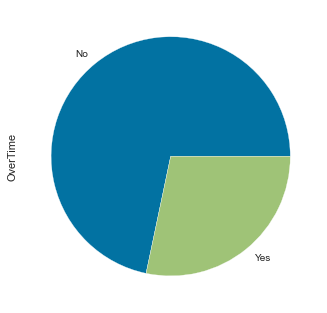

In [25]:
for col in eda.select_dtypes('object'):
    plt.figure()
    eda[col].value_counts().plot.pie()

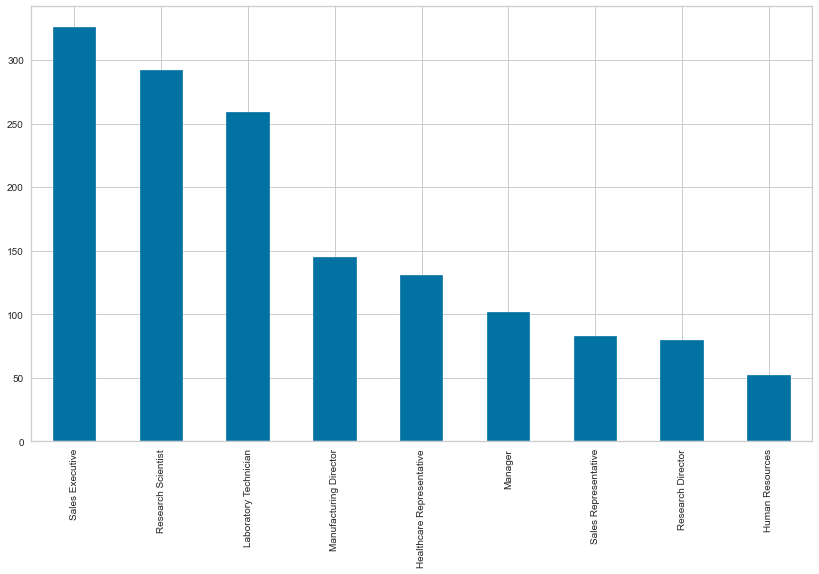

In [26]:
eda.JobRole.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))

#### Relationship between features & target variable

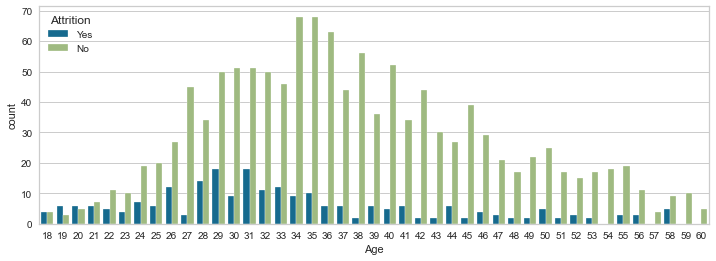

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(x="Age", hue='Attrition', data=eda)

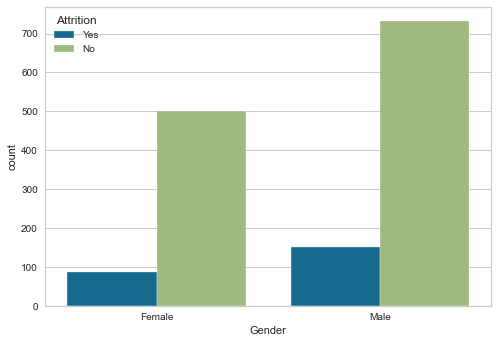

In [28]:
sns.countplot(x="Gender", hue='Attrition', data=eda)

In [29]:
pd.crosstab(eda['Attrition'], eda['Gender'])

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150

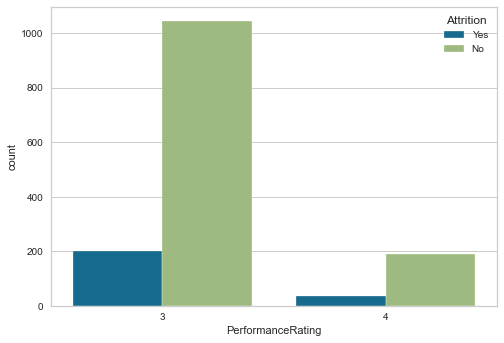

In [30]:
sns.countplot(x="PerformanceRating", hue='Attrition', data=eda)

In [31]:
pd.crosstab(eda['Attrition'], eda['PerformanceRating'])

PerformanceRating     3    4
Attrition                   
No                 1044  189
Yes                 200   37

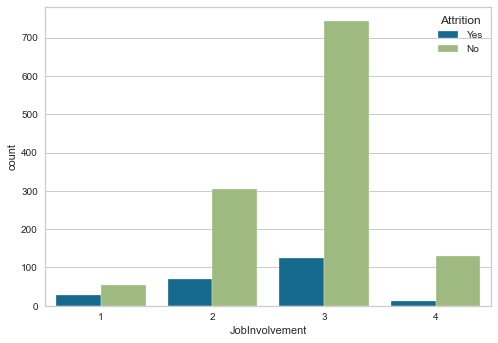

In [32]:
sns.countplot(x="JobInvolvement", hue='Attrition', data=eda)

Text(0.5, 1.0, 'Attrition by Department')

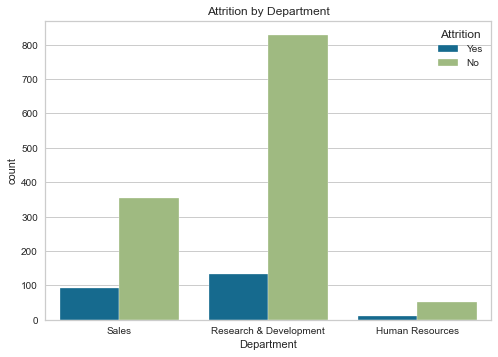

In [33]:
sns.countplot(x="Department", hue='Attrition', data=eda)
plt.title('Attrition by Department')

In [34]:
pd.crosstab(eda['Attrition'], eda['Department'])

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92

In [35]:
pd.crosstab(eda['Attrition'], eda['StockOptionLevel'])

StockOptionLevel    0    1    2   3
Attrition                          
No                477  540  146  70
Yes               154   56   12  15

In [36]:
# Group analysis
eda.groupby(['Attrition','Gender']).mean()

Age   DailyRate  DistanceFromHome  Education  \
Attrition Gender                                                       
No        Female  38.155689  821.608782          8.914172   2.960080   
          Male    37.154372  806.273224          8.916667   2.904372   
Yes       Female  32.574713  731.482759         10.919540   2.781609   
          Male    34.206667  761.313333         10.466667   2.873333   

                  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Attrition Gender                                                        
No        Female                 2.782435   66.089820        2.746507   
          Male                   2.763661   65.857923        2.786885   
Yes       Female                 2.367816   64.827586        2.528736   
          Male                   2.520000   66.006667        2.513333   

                  JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
Attrition Gender                                                           
No        Female  2.197605         2.728543    7019.429142  14621.592814   
          Male    2.110656         2.812842    6704.964481  14022.251366   
Yes       Female  1.655172         2.425287    4769.735632  14979.850575   
          Male    1.626667         2.493333    4797.160000  14315.393333   

                  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
Attrition Gender                                                             
No        Female            2.866267          15.187625           3.157685   
          Male              2.494536          15.260929           3.150273   
Yes       Female            2.505747          15.252874           3.172414   
          Male              3.193333          15.006667           3.146667   

                  RelationshipSatisfaction  StockOptionLevel  \
Attrition Gender                                               
No        Female                  2.722555          0.832335   
          Male                    2.741803          0.853825   
Yes       Female                  2.448276          0.482759   
          Male                    2.686667          0.553333   

                  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
Attrition Gender                                                              
No        Female          12.327345               2.908184         2.760479   
          Male            11.545082               2.781421         2.795082   
Yes       Female           8.264368               2.586207         2.781609   
          Male             8.233333               2.646667         2.586667   

                  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
Attrition Gender                                                                
No        Female        7.459082            4.604790                 2.339321   
          Male          7.307377            4.401639                 2.162568   
Yes       Female        5.919540            3.310345                 2.034483   
          Male          4.673333            2.666667                 1.893333   

                  YearsWithCurrManager  
Attrition Gender                        
No        Female              4.433134  
          Male                4.322404  
Yes       Female              3.241379  
          Male                2.626667

<Figure size 576x288 with 0 Axes>

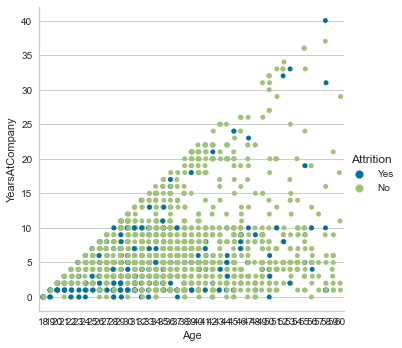

In [37]:
# Display correlation between numeric variables
plt.figure(figsize=(8, 4))
sns.catplot(x="Age", y="YearsAtCompany", data=raw_data, hue="Attrition")

<Figure size 576x288 with 0 Axes>

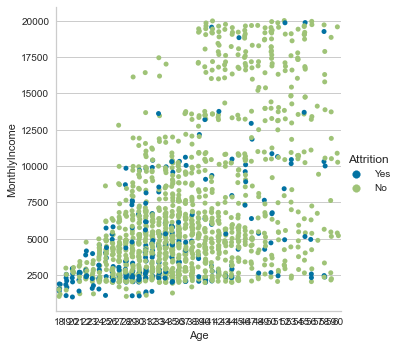

In [38]:
# Display correlation between numeric variables
plt.figure(figsize=(8, 4))
sns.catplot(x="Age", y="MonthlyIncome", data=raw_data, hue="Attrition")

<ipython-input-39-bf4f52a6a067>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 4))


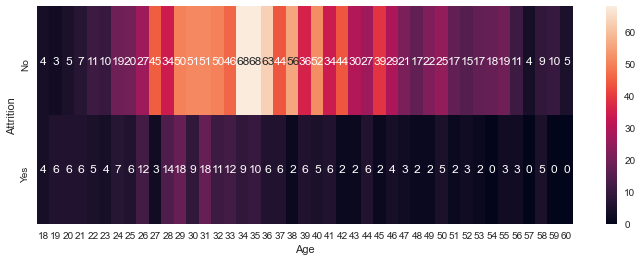

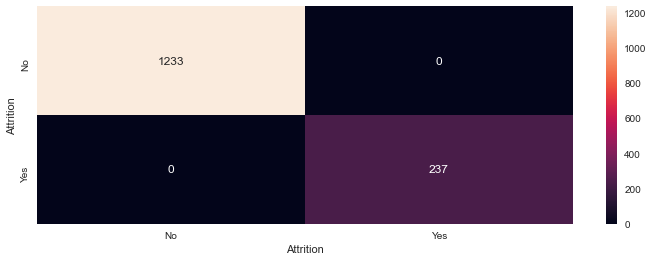

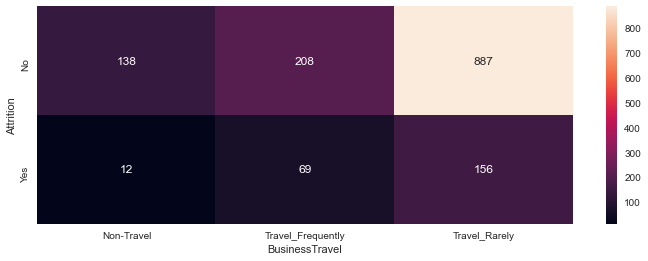

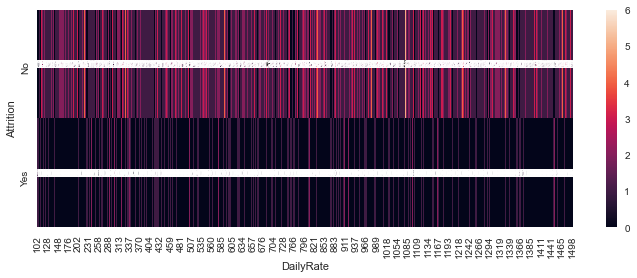

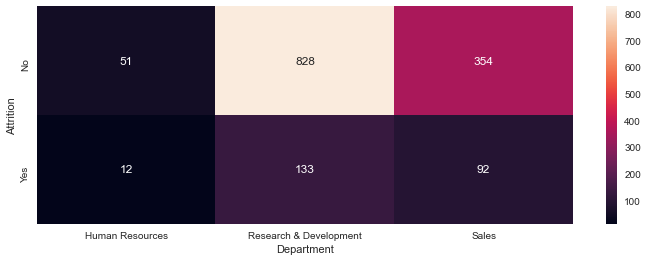

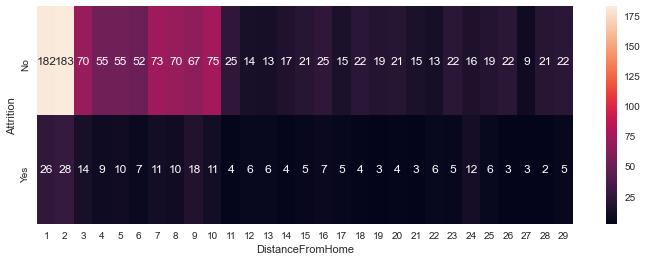

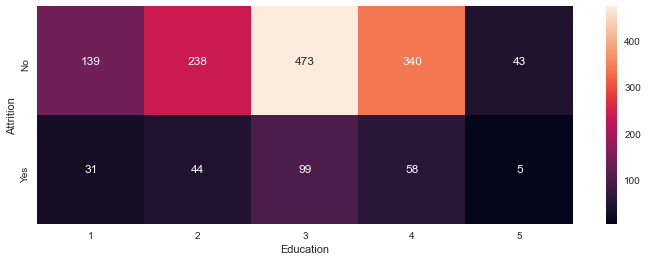

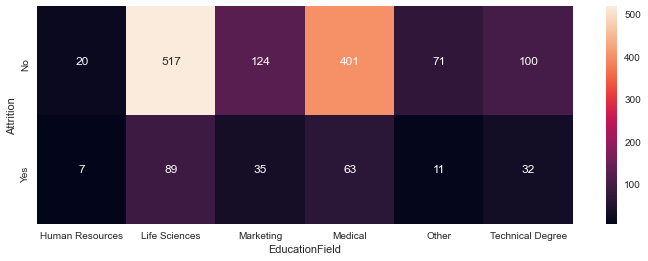

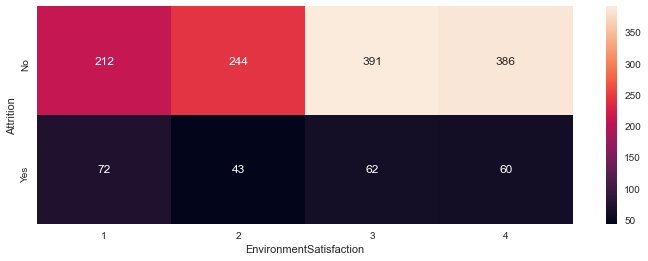

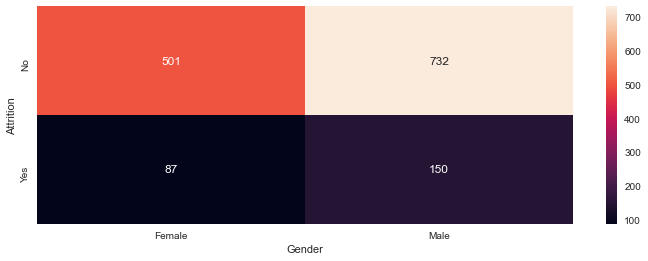

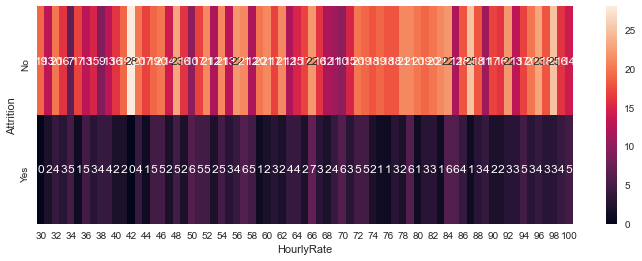

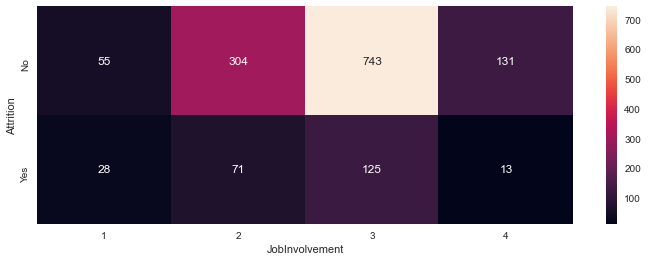

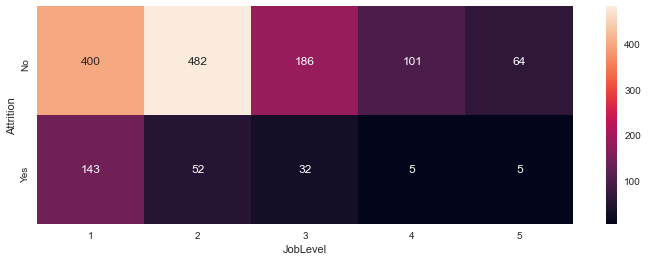

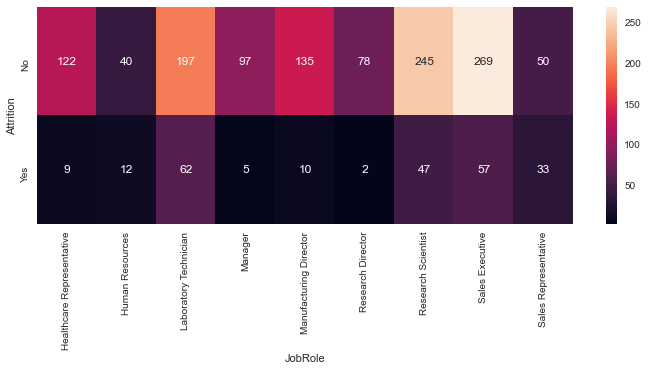

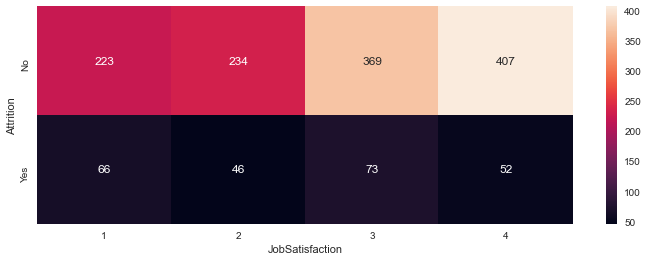

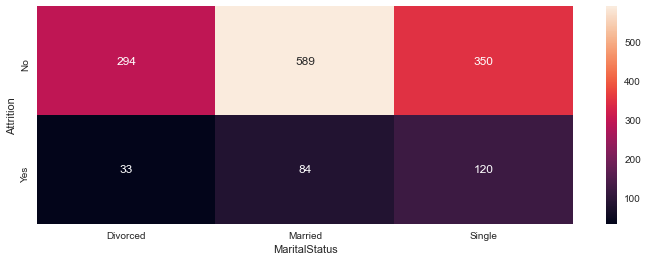

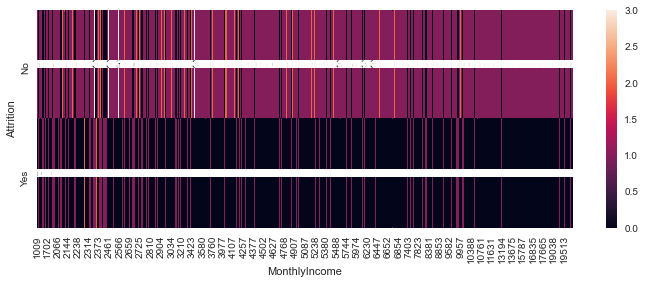

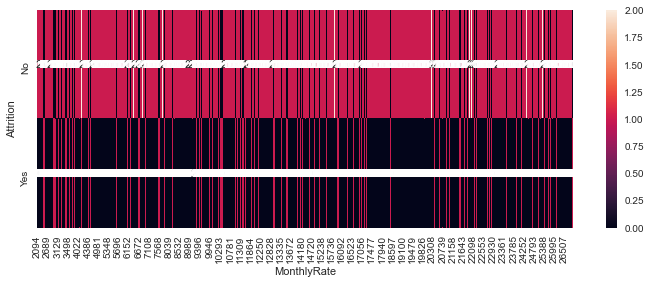

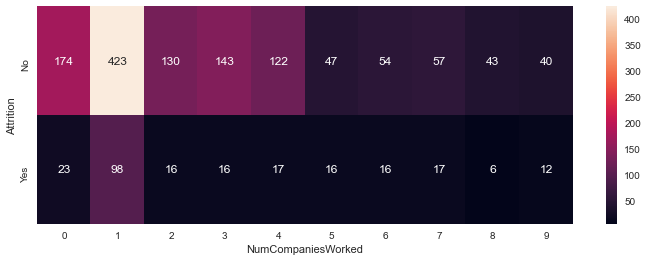

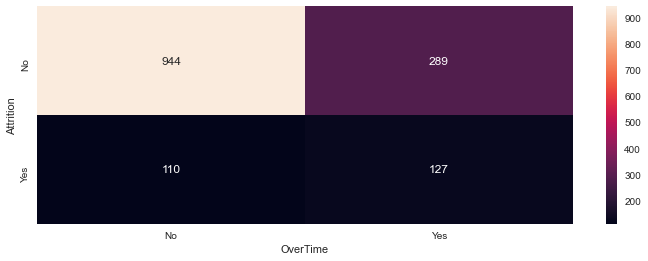

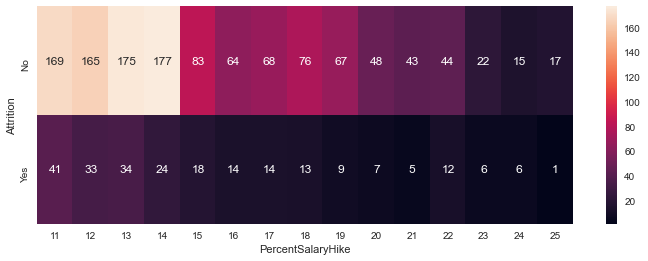

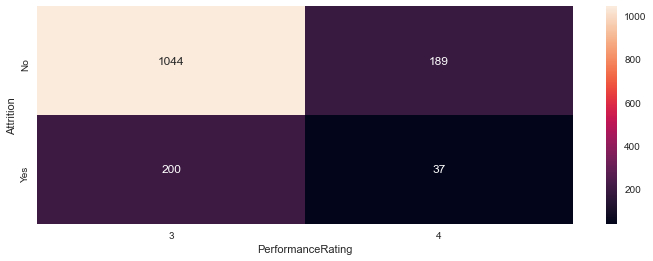

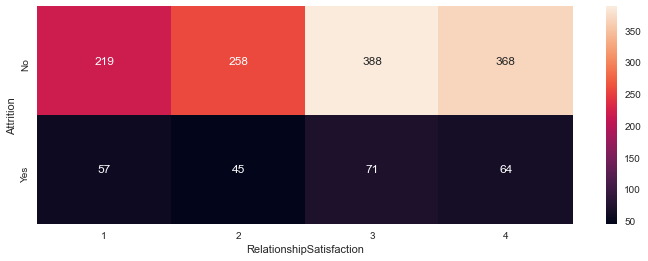

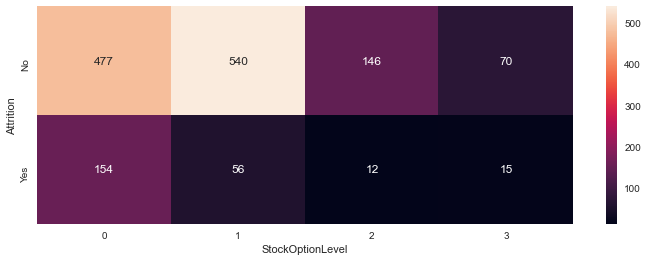

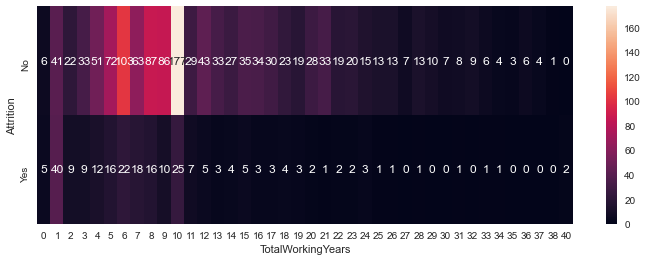

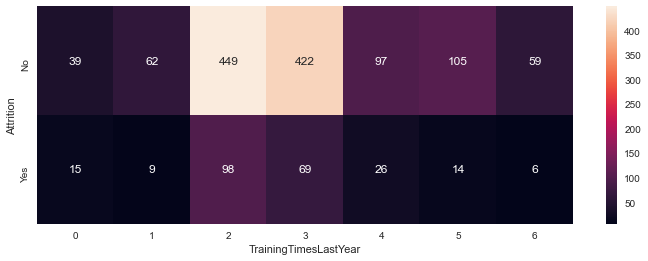

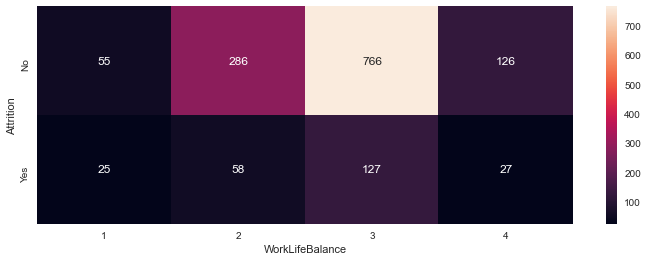

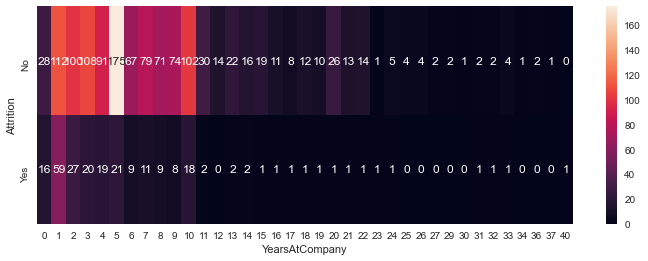

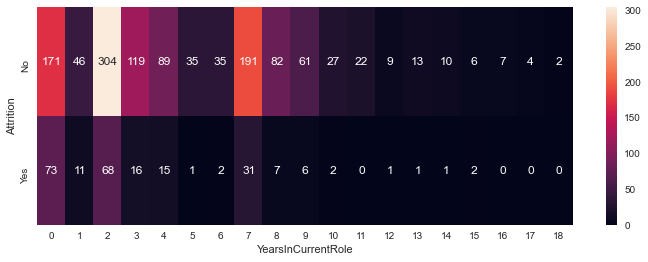

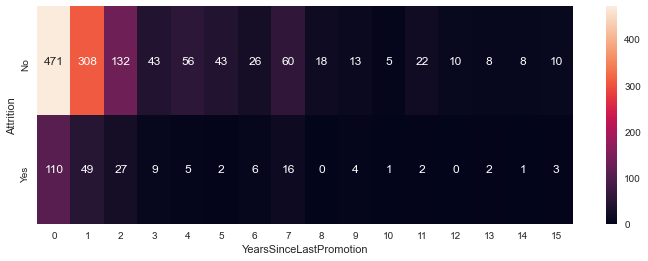

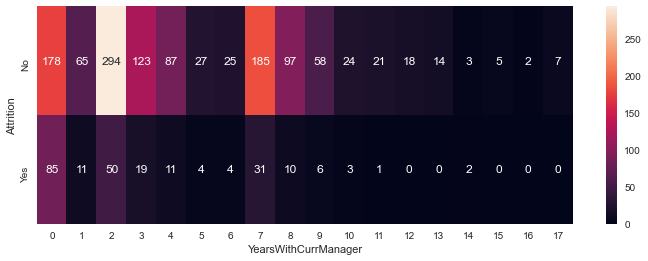

In [39]:
# Heatmap target variable vs each feature
for col in eda:
    plt.figure(figsize=(12, 4))
    sns.heatmap(pd.crosstab(eda['Attrition'], eda[col]), annot=True, fmt='d')

#### Outliers analysis

<ipython-input-40-fbe410c7b91d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-40-fbe410c7b91d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-40-fbe410c7b91d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


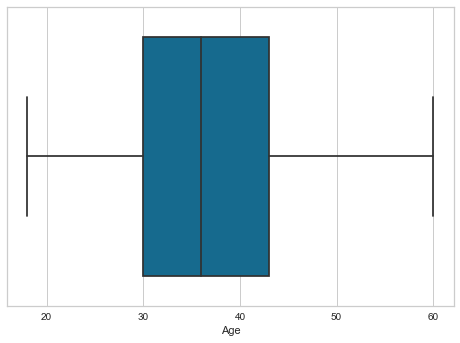

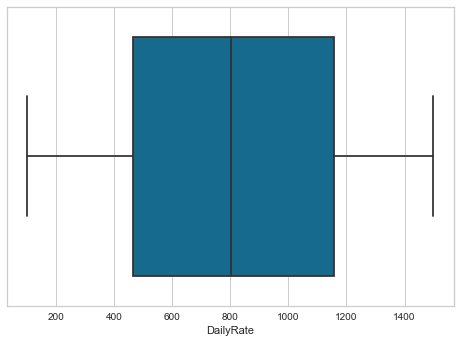

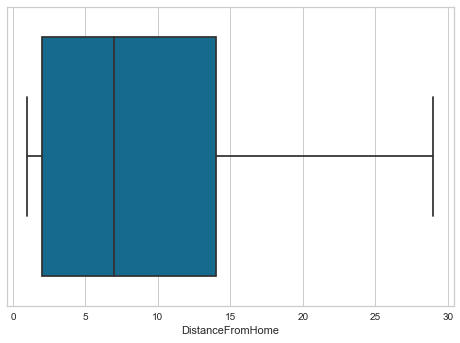

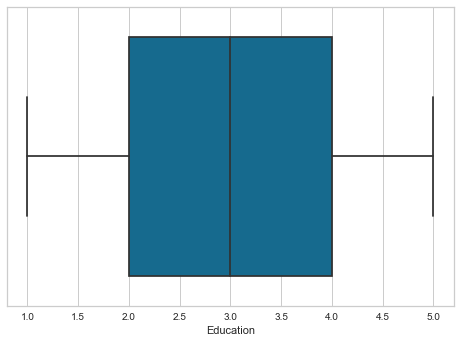

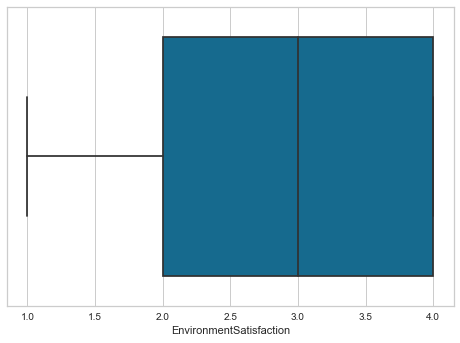

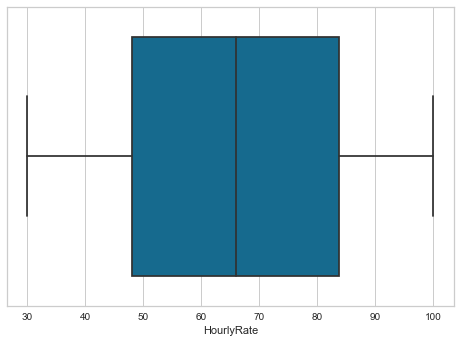

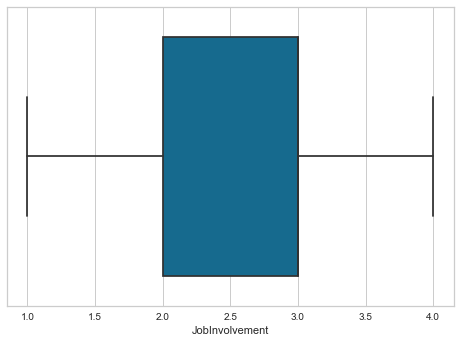

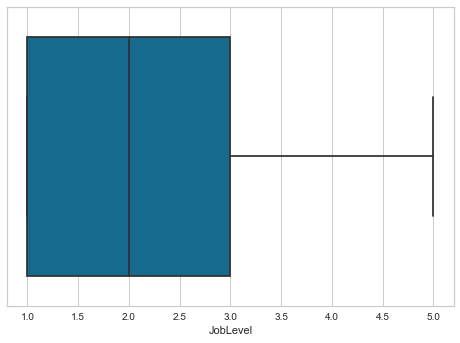

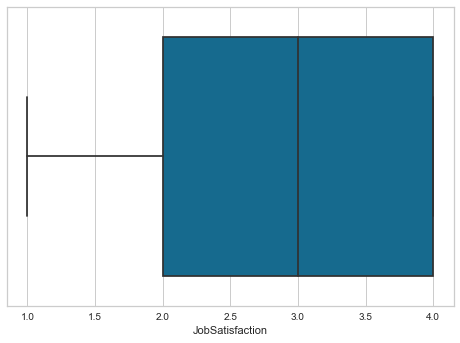

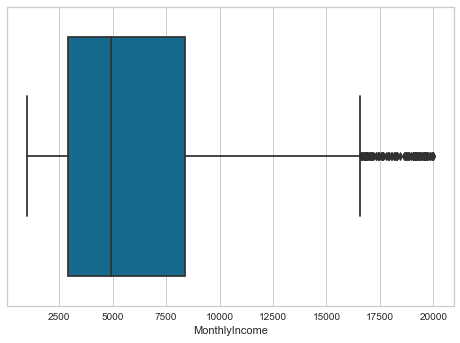

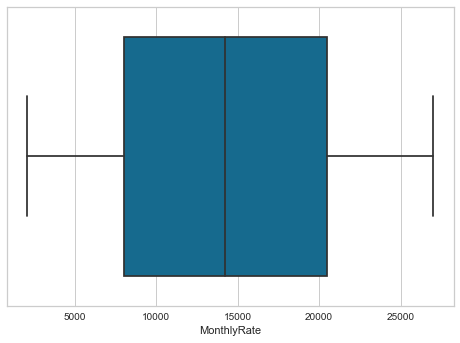

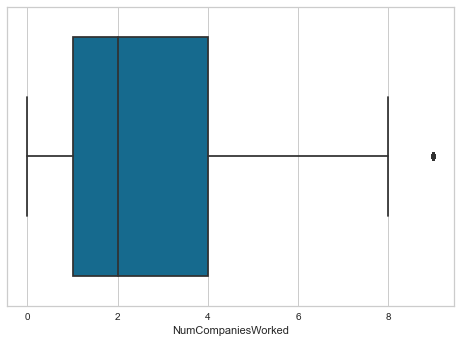

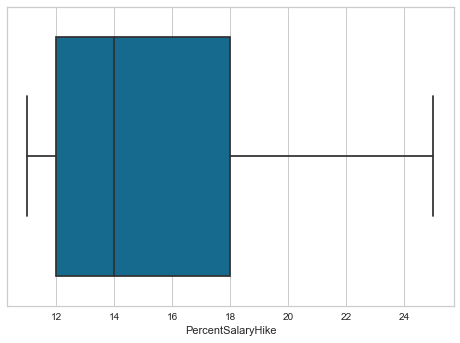

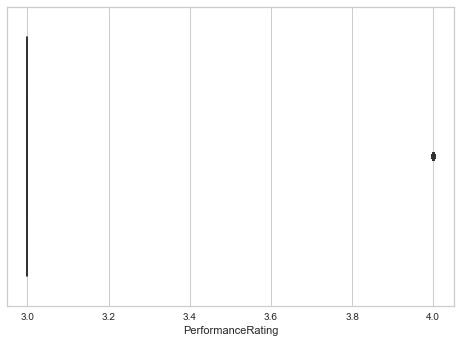

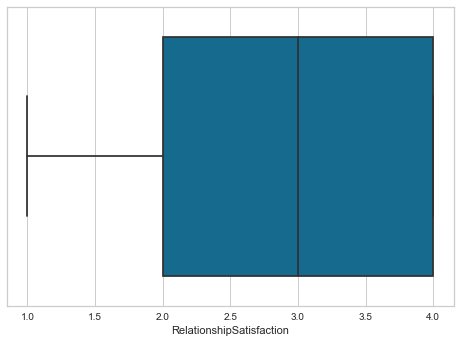

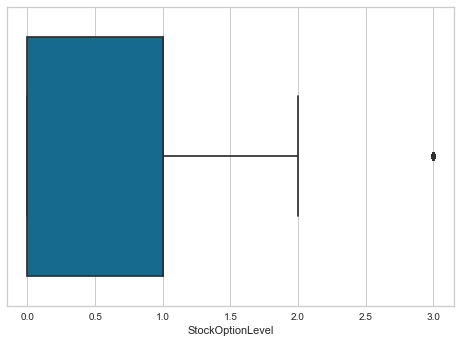

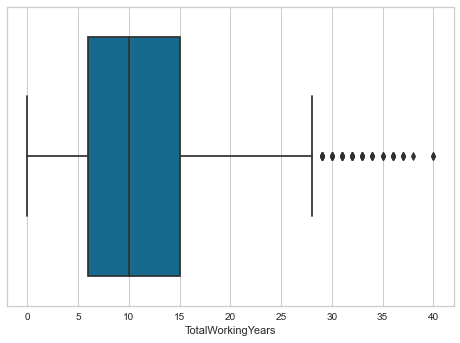

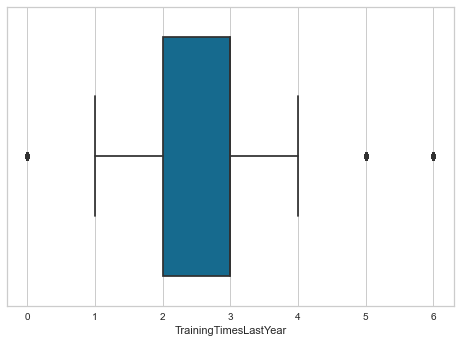

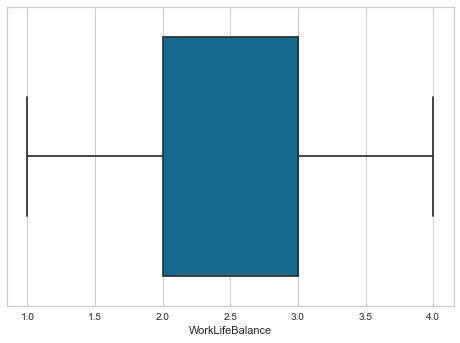

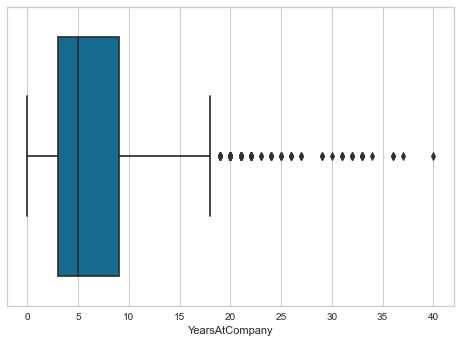

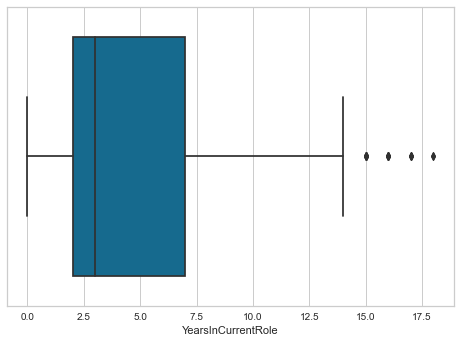

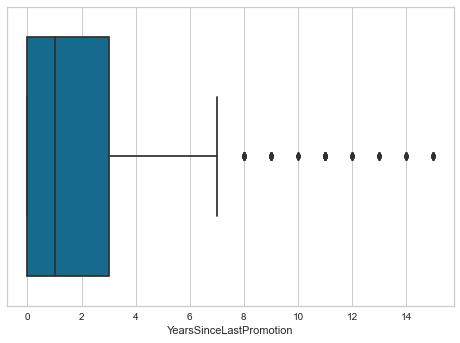

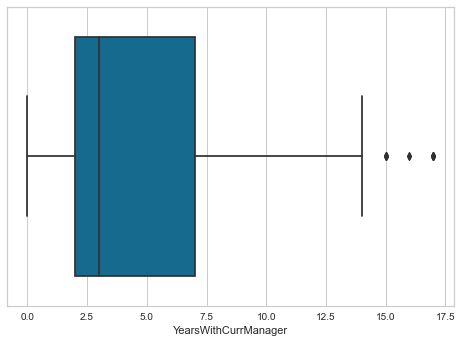

In [40]:
for col in eda.select_dtypes('int64'):
    plt.figure()
    sns.boxplot(eda[col])

#### Correlation analysis

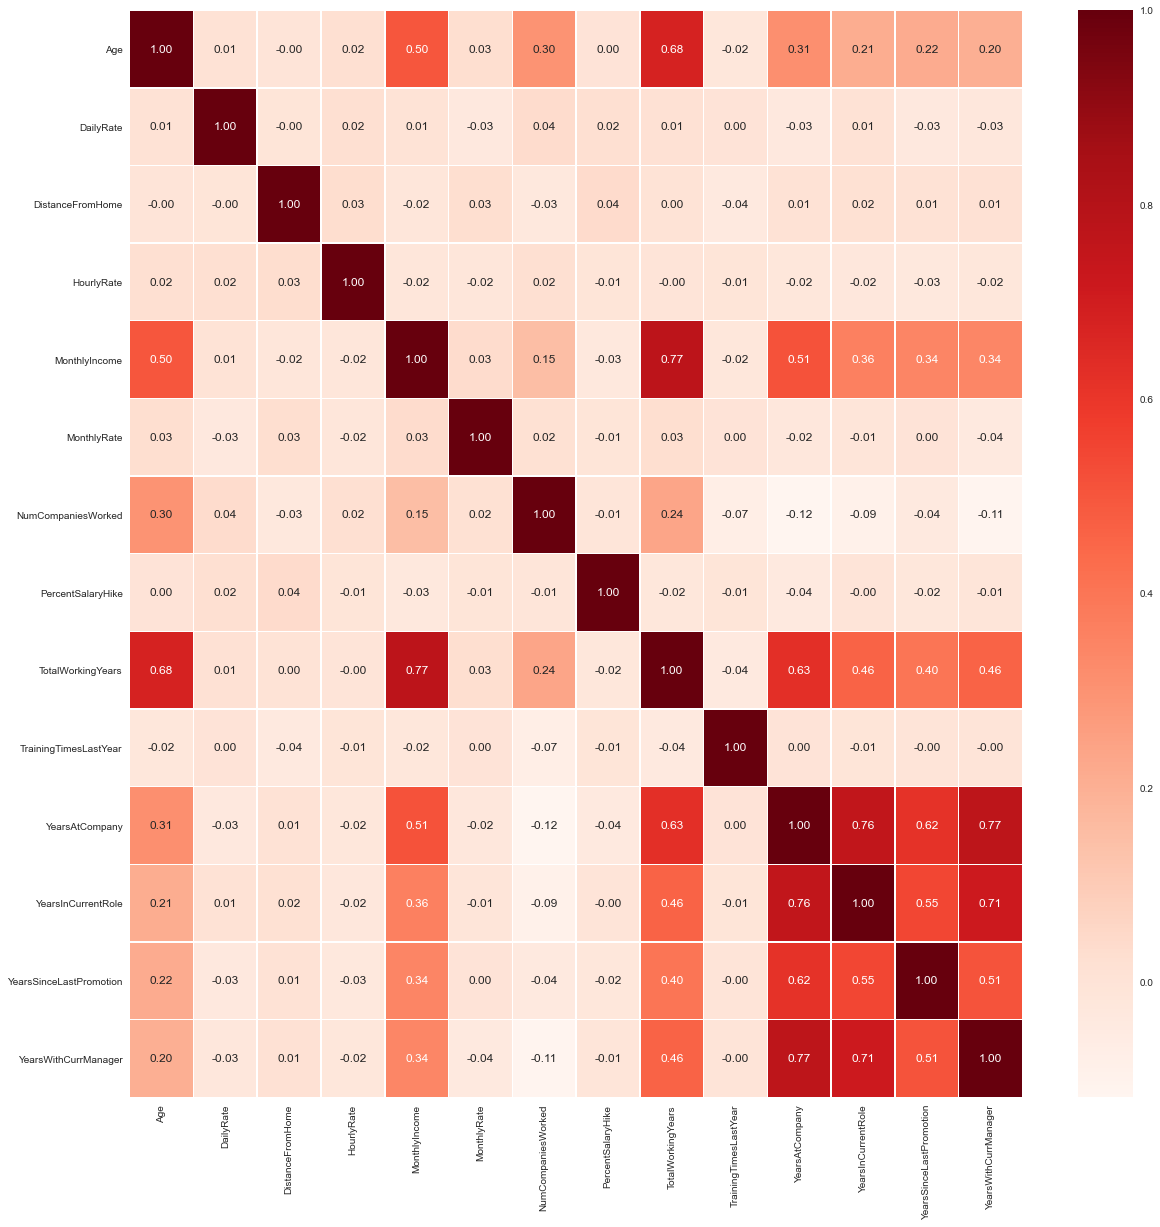

In [41]:
# Display correlation between numeric variables
plt.figure(figsize=(20, 20))
sns.heatmap(num_data.corr(), annot=True, linewidth=.5, fmt='.2f', cmap='Reds')

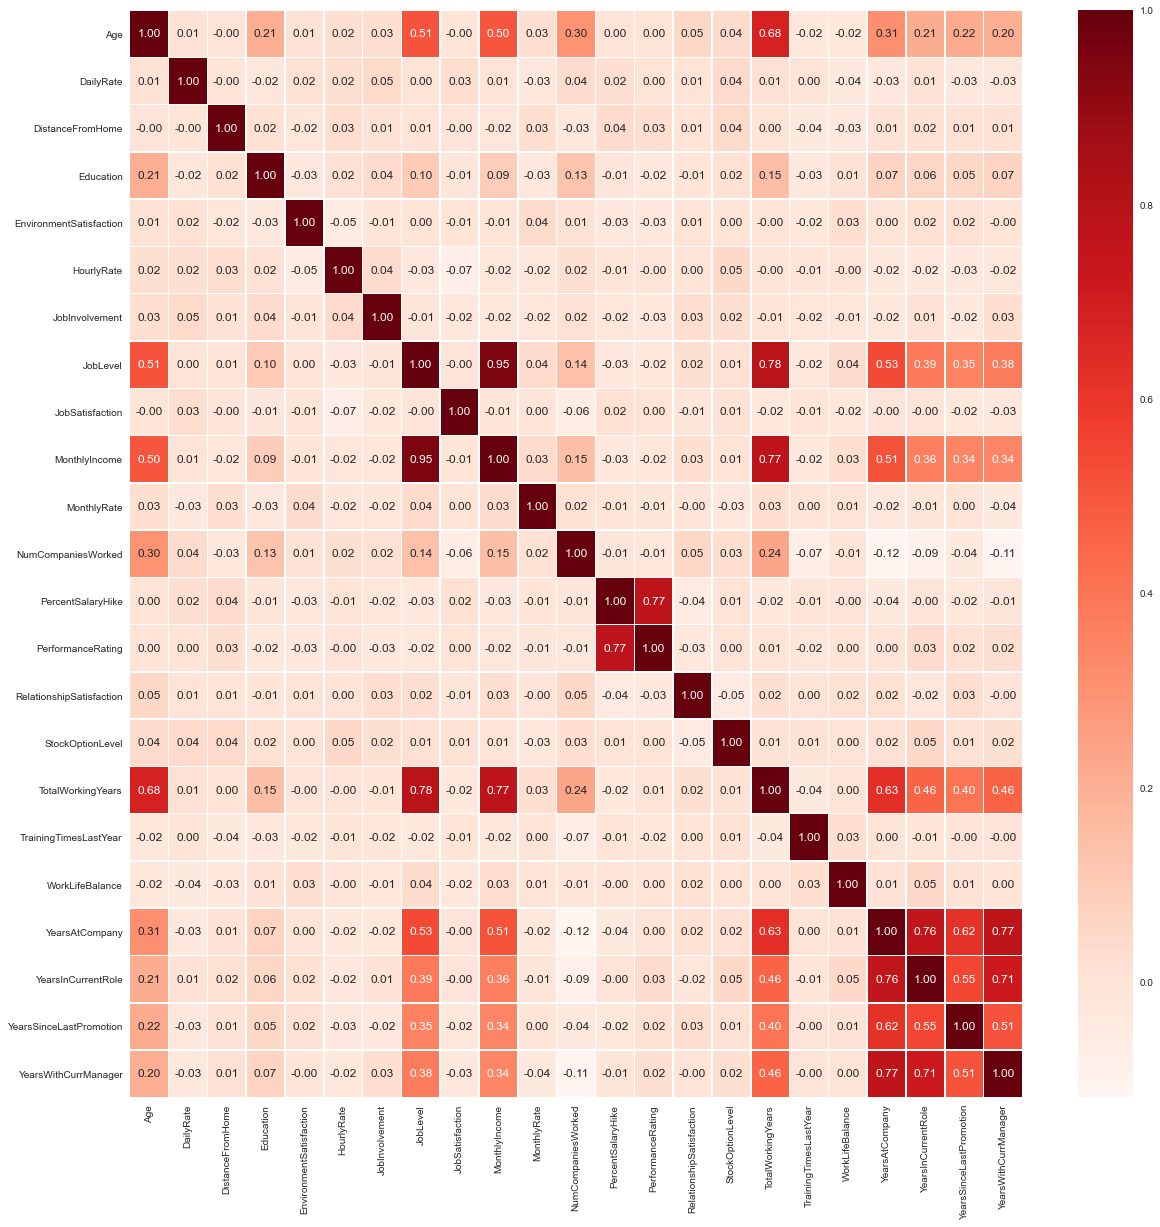

In [42]:
# Display correlation between numeric variables
plt.figure(figsize=(20, 20))
sns.heatmap(eda.corr(), annot=True, linewidth=.5, fmt='.2f', cmap='Reds')

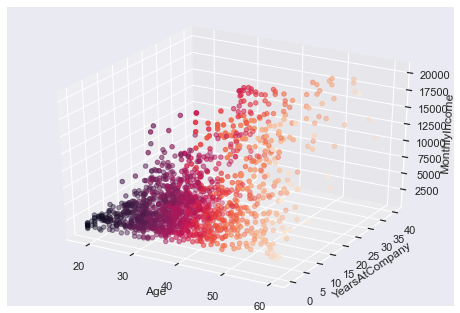

In [43]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = eda['Age']
y = eda['YearsAtCompany']
z = eda['MonthlyIncome']

ax.set_xlabel('Age')
ax.set_ylabel('YearsAtCompany')
ax.set_zlabel('MonthlyIncome')

ax.scatter(x, y, z, c=x, marker='o')

plt.show()

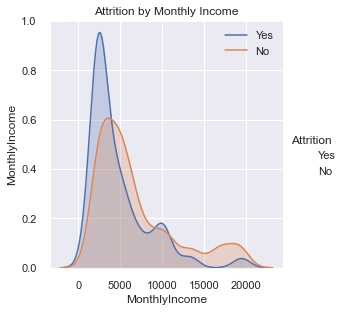

In [44]:
# Display relationships between variables
mon_inc = eda[['Attrition','MonthlyIncome']]
sns.pairplot(mon_inc, hue = 'Attrition', height=4)
plt.title('Attrition by Monthly Income')
plt.legend()

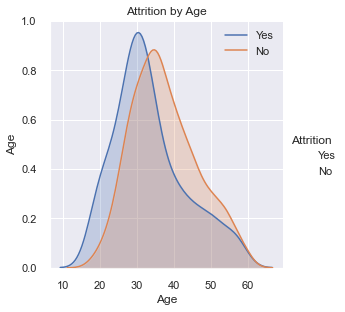

In [45]:
# Display relationships between variables
mon_inc = eda[['Attrition','Age']]
sns.pairplot(mon_inc, hue = 'Attrition', height=4)
plt.title('Attrition by Age')
plt.legend()

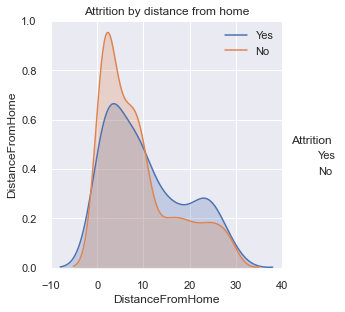

In [46]:
# Display relationships between variables
dist_home = eda[['Attrition','DistanceFromHome']]
sns.pairplot(dist_home, hue = 'Attrition', height=4)
plt.title('Attrition by distance from home')
plt.legend()

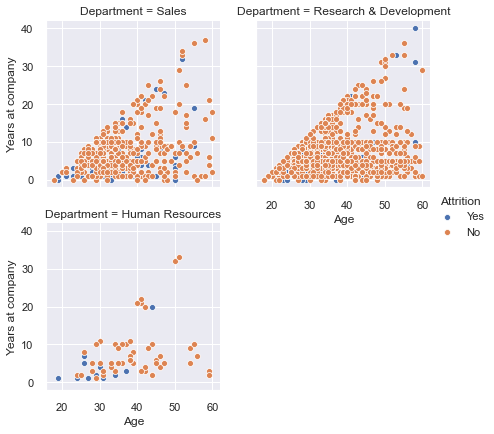

In [47]:
g = sns.FacetGrid(eda, col="Department", hue="Attrition", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="Age", y="YearsAtCompany")
g.set_axis_labels("Age", "Years at company")
g.add_legend()

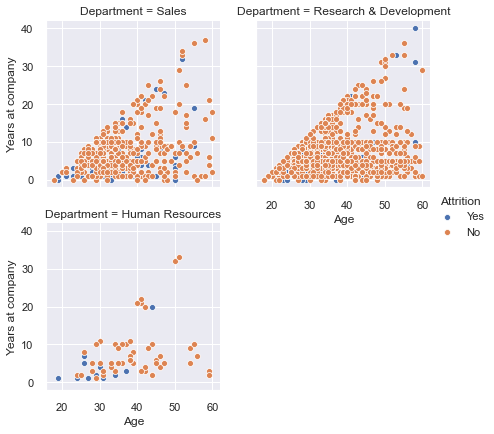

In [48]:
g = sns.FacetGrid(eda, col="Department", hue="Attrition", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="Age", y="YearsAtCompany")
g.set_axis_labels("Age", "Years at company")
g.add_legend()

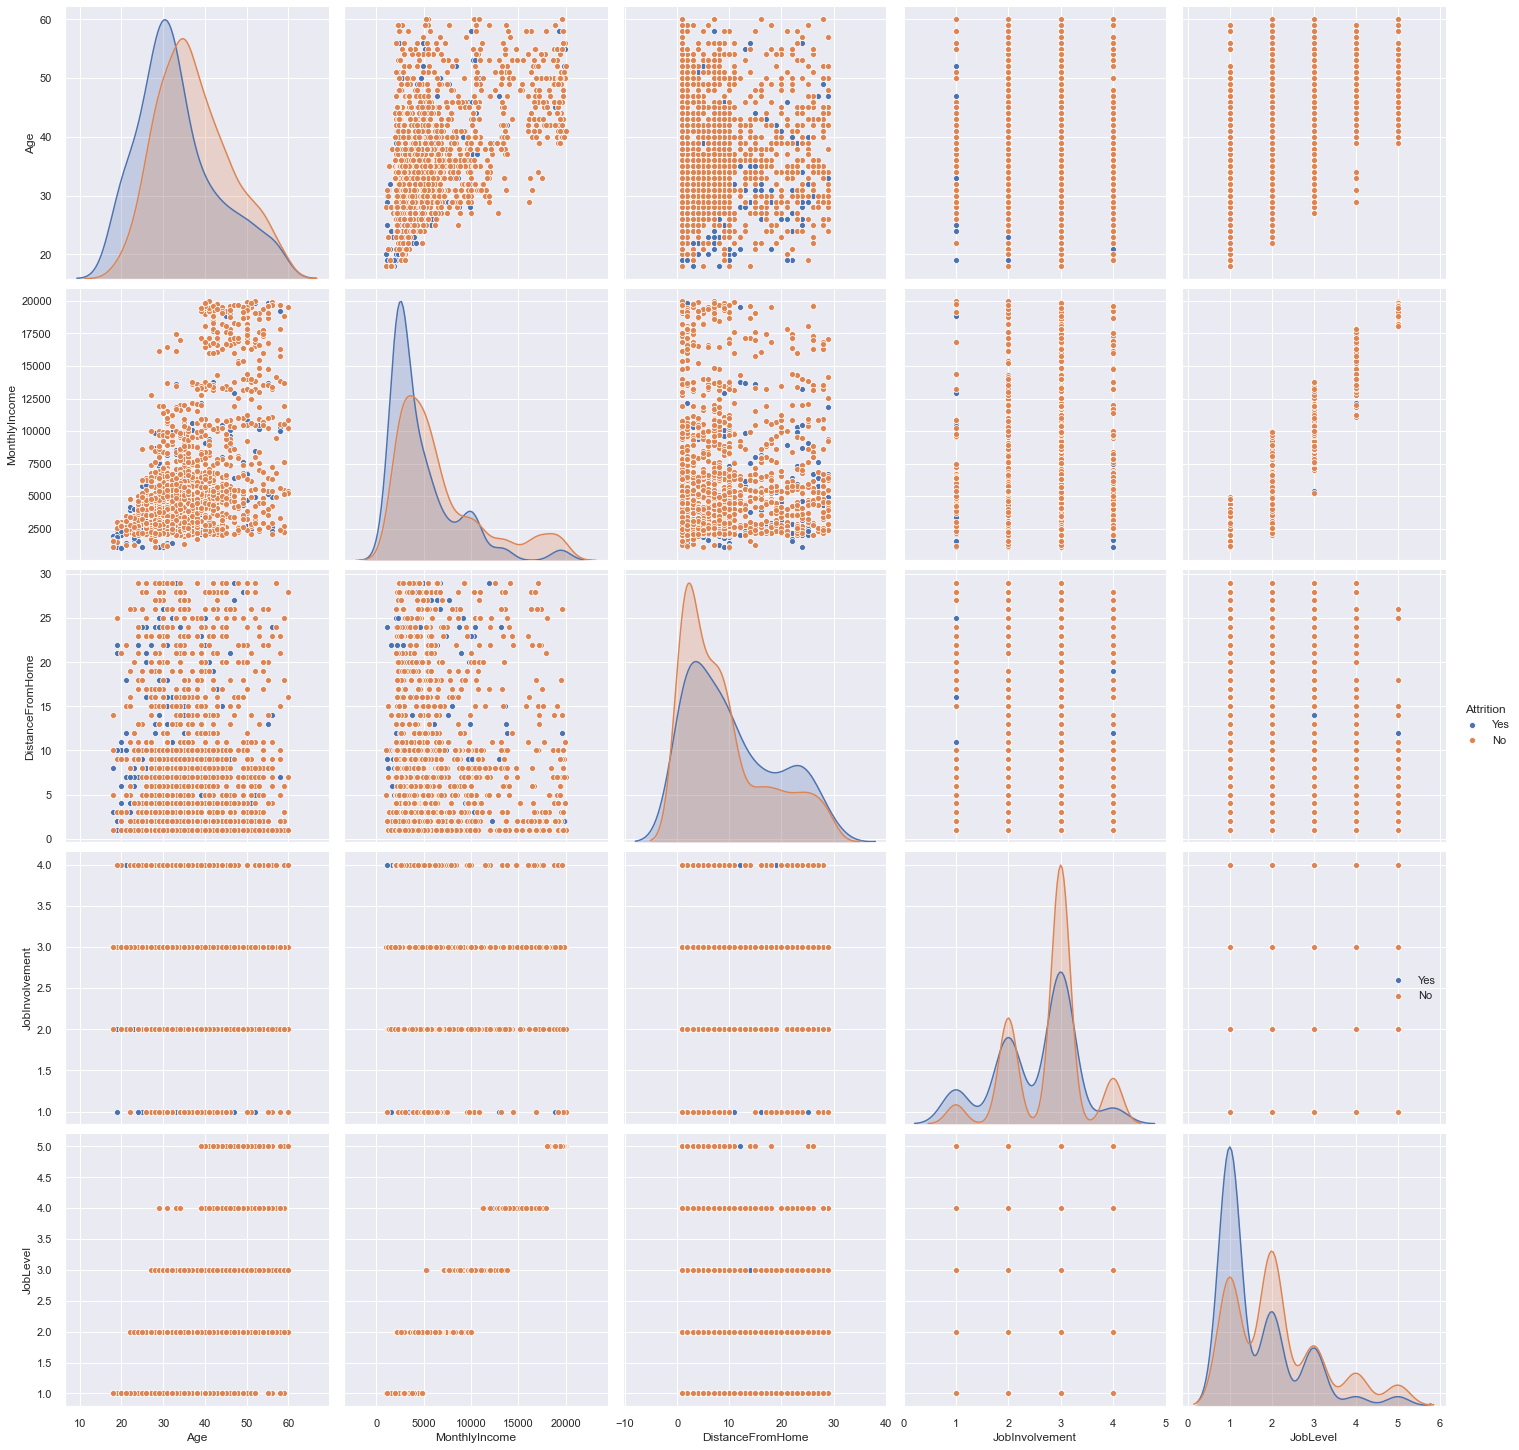

In [49]:
# Display relationships between variables
subset = eda[['Attrition','Age','MonthlyIncome','Department','DistanceFromHome','JobInvolvement','JobRole','JobLevel']]
sns.pairplot(subset, hue = 'Attrition', height=4)
plt.legend()

In [50]:
# Display relationships between variables
#sns.pairplot(eda, hue = 'Attrition')

In [51]:
# Display relationships between variables
#sns.pairplot(ord_data)

#### Feature engineering

In [52]:
# Create new column OverallSatisfaction with the sum of the 3 staifaction columns
eda["OverallSatisfaction"] = eda["EnvironmentSatisfaction"] + eda["JobSatisfaction"] + eda["RelationshipSatisfaction"]

In [53]:
satisfaction = eda[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction', 'OverallSatisfaction']]

In [54]:
# Drop columns "EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction"
eda.drop(eda.columns[[8,14,22]], inplace=True, axis=1)

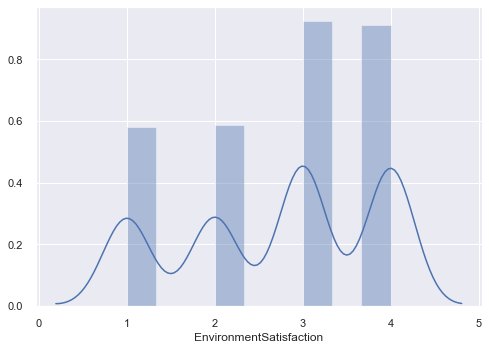

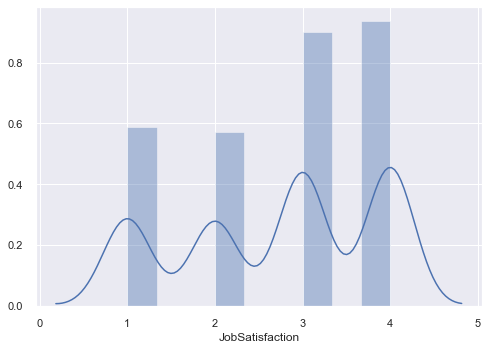

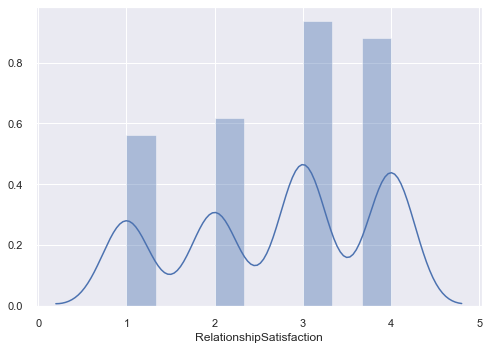

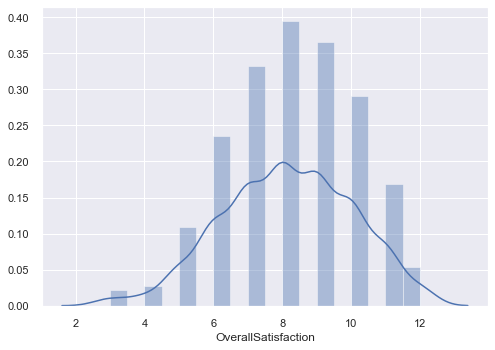

In [55]:
for col in satisfaction.select_dtypes('int64'):
    plt.figure()
    sns.distplot(satisfaction[col])

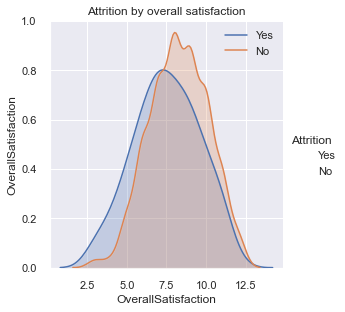

In [56]:
# Display relationships between variables
all_sat = eda[['Attrition','OverallSatisfaction']]
sns.pairplot(all_sat, hue = 'Attrition', height=4)
plt.title('Attrition by overall satisfaction')
plt.legend()

#### Hypothesis testing

In [57]:
print('The overall satisfaction mean is', eda['OverallSatisfaction'].mean())

The overall satisfaction mean is 8.162585034013606


Determining the Null and Alternative Hypothesis

Null: Group of employees who stays and leaves the company have the same overall satisfaction mean.

Alternative: Group of employees who stays and leaves the company do not have the same overall satisfaction mean.

In [58]:
# Calculate the mean by sub-population
all_sat.groupby('Attrition').mean()

OverallSatisfaction
Attrition                     
No                    8.283861
Yes                   7.531646

In [59]:
# Calculate the variance by sub-population
all_sat.groupby('Attrition').var()

OverallSatisfaction
Attrition                     
No                    3.330072
Yes                   4.250054

In [60]:
# Statistics by group
all_sat.groupby('Attrition').describe()

OverallSatisfaction                                               
                        count      mean       std  min  25%  50%   75%   max
Attrition                                                                   
No                     1233.0  8.283861  1.824849  3.0  7.0  8.0  10.0  12.0
Yes                     237.0  7.531646  2.061566  3.0  6.0  8.0   9.0  12.0

I will proceed to a T-test

Assumption 1: Are the two samples independent? yes. We have employees who stays and those who left the company.

Assumption 2: Are the data from each of the 2 groups following a normal distribution? Yes

Assumption 3: Do the two samples have the same variances (Homogeneity of Variance)? Yes, almost

In [61]:
alpha=0.05

cat1 = all_sat[all_sat['Attrition']=='No']
cat2 = all_sat[all_sat['Attrition']=='Yes']

tset, pval = ttest_ind(cat1['OverallSatisfaction'], cat2['OverallSatisfaction'])
print('P-value = {}'.format(pval))

if pval < alpha:
  print("We are rejecting the null Hypothesis.")
else:
  print("We are accepting the null hypothesis")

P-value = 1.5585442656929633e-08
We are rejecting the null Hypothesis.


The p-value of the test is less than the significance level alpha (e.g., 0.05). 
This means that we can conclude that the leavers average overall satisfaction is statistically different from the average overall satisfaction of employees who stays in the company. 

#### Analysis of the scales of numerical features 

In [62]:
# Highlight cells that hold the maximum value of a column. 
# with styler background_gradient which gives columns a gradient background color based on their values
num_data.describe().T.drop("count", axis=1).style.background_gradient(
    subset=["mean", "50%"], cmap="Reds"
)

#### Analysis of encoding requirements for catgorical & ordinal features

In [63]:
# Ordinal data overview
ord_data.describe().T.head(9)

count      mean       std  min  25%  50%  75%  max
Education                 1470.0  2.912925  1.024165  1.0  2.0  3.0  4.0  5.0
EnvironmentSatisfaction   1470.0  2.721769  1.093082  1.0  2.0  3.0  4.0  4.0
JobInvolvement            1470.0  2.729932  0.711561  1.0  2.0  3.0  3.0  4.0
JobLevel                  1470.0  2.063946  1.106940  1.0  1.0  2.0  3.0  5.0
JobSatisfaction           1470.0  2.728571  1.102846  1.0  2.0  3.0  4.0  4.0
PerformanceRating         1470.0  3.153741  0.360824  3.0  3.0  3.0  3.0  4.0
RelationshipSatisfaction  1470.0  2.712245  1.081209  1.0  2.0  3.0  4.0  4.0
StockOptionLevel          1470.0  0.793878  0.852077  0.0  0.0  1.0  1.0  3.0
WorkLifeBalance           1470.0  2.761224  0.706476  1.0  2.0  3.0  3.0  4.0

In [64]:
# Categorical data overview
cat_data.describe().T.head(9)

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

In [65]:
#eda = pd.get_dummies(eda, columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"], 
                         # prefix =["Trav", "Dept", "Edu", "Sex", "JobR", "MarSta","OverT"],
                         # drop_first=True)

#### Preprocessing pipeline

In [66]:
num_feat = make_column_selector(dtype_include=np.number)
cat_feat = make_column_selector(dtype_exclude=np.number)

In [67]:
ss = StandardScaler()
ohe = OneHotEncoder(drop='first')

In [68]:
num_pipe = make_pipeline(ss)
cat_pipe = make_pipeline(ohe)

In [69]:
preprocessor = make_column_transformer((num_pipe, num_feat),(cat_pipe, cat_feat))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000191FA92FD60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000191FA92FE50>)])

#### Copy of dataframe

In [70]:
df = eda.copy()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   EducationField           1470 non-null   object
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobInvolvement           1470 non-null   int64 
 11  JobLevel                 1470 non-null   int64 
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

#### Split data in a stratified way (imbalanced class)

In [72]:
y_col="Attrition"

In [73]:
#Label encoding
le = LabelEncoder()
df[y_col] = le.fit_transform(df[y_col])

In [74]:
X = df.drop(y_col, axis=1)
y = df[y_col]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size= 0.3,  # split size
                                                    random_state=13, # reproducible test
                                                    stratify=y)      # stratify split

In [76]:
# Check splits shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 28), (441, 28), (1029,), (441,))

In [77]:
# Check stratified distribution of target variable after split on train set & test set
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.838678
 1    0.161322
 Name: Attrition, dtype: float64,
 0    0.839002
 1    0.160998
 Name: Attrition, dtype: float64)

In [78]:
# Check stratified distribution of target variable after split on train set & test set
y_train.value_counts(), y_test.value_counts()

(0    863
 1    166
 Name: Attrition, dtype: int64,
 0    370
 1     71
 Name: Attrition, dtype: int64)

#### Storing machine learning algorithms in a variable

Inspired from:
https://dibyendudeb.com/comparing-machine-learning-algorithms/

# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [107]:
lr0_params = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

lr = GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                            ("LR", LogisticRegression())]),
                                               param_grid = lr0_params, 
                                               cv=skf, 
                                               n_jobs=-1).fit(X_train, y_train).best_estimator_
#importance = lr.named_steps['LR'].coef_
#coefs = pd.DataFrame(lr.named_steps['LR'].coef_, columns=['Feature importance']).sort_values('Feature importance',ascending=False)

Training set score: 0.858114674441205
Test set score: 0.8458049886621315


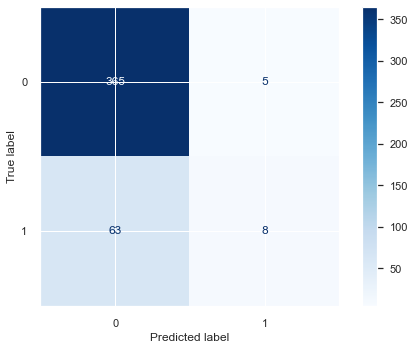

In [79]:
cart_params = {'CART__max_depth':list(range(1,7)),
               'CART__max_features': list(range(1,10))}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

cart = GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                              ("CART", DecisionTreeClassifier(max_depth=3, max_features=10, random_state=42))]),
                                               param_grid = cart_params, 
                                               cv=skf, 
                                               n_jobs=-1).fit(X_train, y_train).best_estimator_
print('Training set score: ' + str(cart.score(X_train,y_train)))
print('Test set score: ' + str(cart.score(X_test,y_test)))
plot_confusion_matrix(cart, X_test, y_test, cmap=plt.cm.Blues)  

C:\Users\USER\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


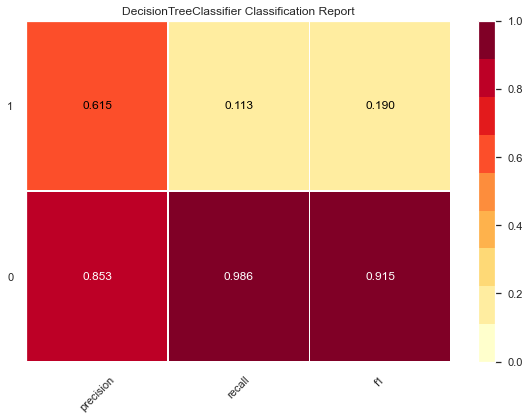

In [80]:
# Classification Report
fig, ax = plt.subplots(figsize=(8,6))
cr_viz = ClassificationReport(cart)
#cr_viz.fit(X_train, y_train)
cr_viz.score(X_test, y_test)
cr_viz.poof()

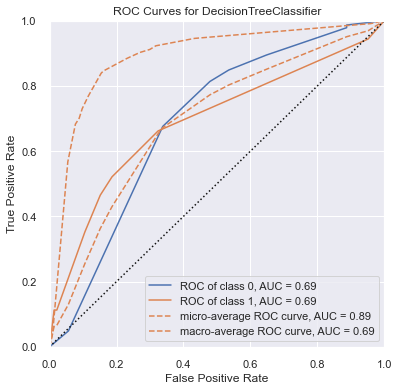

In [81]:
# ROC curve
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(cart)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.poof()

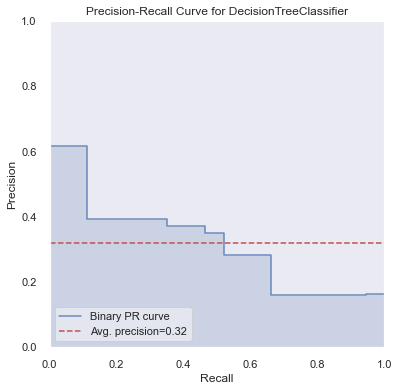

In [82]:
# Precision Recall curve
fig, ax = plt.subplots(figsize=(6,6))
pr_viz = PrecisionRecallCurve(cart)
pr_viz.fit(X_train, y_train)
pr_viz.score(X_test, y_test)
pr_viz.poof()

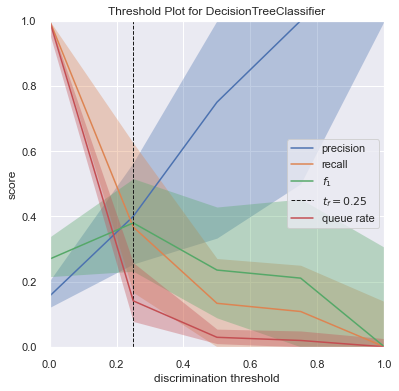

In [83]:
# Discrimination Threshold
fig, ax = plt.subplots(figsize=(6,6))
pr_viz = DiscriminationThreshold(cart)
pr_viz.fit(X_train, y_train)
pr_viz.poof()

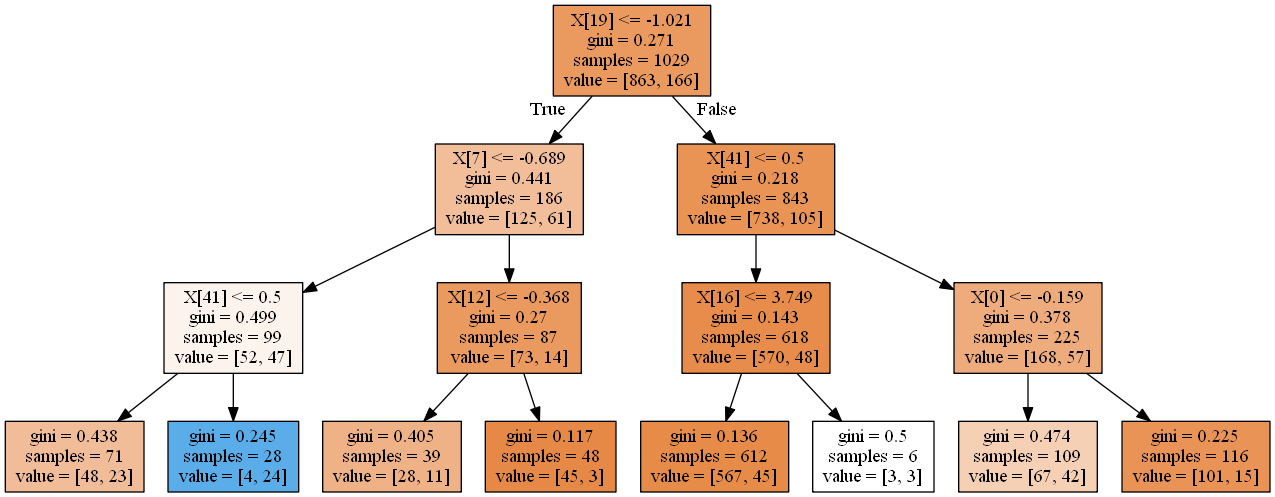

In [84]:
# Tree
dot_data = StringIO()
export_graphviz(cart.named_steps["CART"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

#Features importance
fig, ax = plt.subplots(figsize=(6,6))
fi_viz = FeatureImportances(cart)
fi_viz.fit(X_train, y_train)
fi_viz.poof()

FalsePositiveRate = FalsePositives / (FalsePositives + TrueNegatives)

TruePositiveRate = TruePositives / (TruePositives + False Negatives)

ROC Curve: Plot of False Positive Rate (x) vs. True Positive Rate (y)

In [91]:
# Function evaluate classifiers 
def eval_clf(models, X_train, y_train, X_test, y_test):

    models_columns = []
    models_comparison = pd.DataFrame(columns = models_columns)

    row_index = 0
    for i in models:  
        print ("Best parameters %s : \n" %i , models[i].best_params_)
        model = models[i].best_estimator_
        y_pred = model.fit(X_train, y_train).predict(X_test)
        
        # Plot confusion matrix
        plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
        
        fpr, tpr, threshold = roc_curve(y_test, y_pred)

        models_comparison.loc[row_index, 'Model name']     = i
        models_comparison.loc[row_index, 'Train Accuracy']     = round(model.score(X_train, y_train), 4)
        models_comparison.loc[row_index, 'Test Accuracy']      = round(model.score(X_test, y_test),  4)
        #models_comparison.loc[row_index, 'Balanced Accuracy']  = round(model.balanced_accuracy_score(X_test, y_test),  4)
        models_comparison.loc[row_index, 'Precision']      = precision_score(y_test, y_pred)
        models_comparison.loc[row_index, 'Recall']         = recall_score(y_test, y_pred)
        models_comparison.loc[row_index, 'AUC']            = auc(fpr, tpr)

        row_index+=1
    
    models_comparison.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)   
    
    return models_comparison

StratifiedKFold

SKLEARN: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [95]:
# Hyperparameters for each model
lr0_params = {}
knn0_params = {}
knn_params = {'KNN__n_neighbors': list(range(1,10))}
svc0_params = {}
svc_params = {'SVC__C': [0.1,1, 10, 100], 'SVC__gamma': [1,0.1,0.01,0.001],'SVC__kernel': ['rbf', 'poly', 'sigmoid']}
cart0_params = {}
cart_params = {'CART__max_depth':list(range(1,7)),
               'CART__max_features': list(range(1,10))}
rf0_params = {}
rf_params = {'RF__n_estimators': [5, 10, 50, 100],
             'RF__max_depth':list(range(1,15)),
             'RF__max_features': list(range(1,10))}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

models = { 'Logistic Regression': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                           ("LR", LogisticRegression())]),
                                               param_grid = lr0_params, 
                                               cv=skf, #5
                                               n_jobs=-1)
                                .fit(X_train, y_train),
          
           'K-nearest neighbors 0': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                           ("KNN", KNeighborsClassifier())]),
                                               param_grid = knn0_params, 
                                               cv=skf, #5
                                               n_jobs=-1)
                                .fit(X_train, y_train),
          
           'K-nearest neighbors best estimator': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                                        ("KNN", KNeighborsClassifier())]),
                                               param_grid = knn_params, 
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
           'SVC 0': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                           ("SVC", SVC(probability=True))]),
                                               param_grid = svc0_params, 
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
           'SVC best estimator': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                        ("SVC", SVC(probability=True))]),
                                               param_grid = svc_params, 
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
          
           'Decision Tree Classifier 0': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                                ("CART", DecisionTreeClassifier(random_state=42))]),
                                               param_grid = cart0_params, 
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
          
           'Decision Tree Classifier best estimator': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                                             ("CART", DecisionTreeClassifier(random_state=42))]),
                                               param_grid = cart_params, #""""""""""cart_params
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
           'Random Forest Classifier 0': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                                ("RF", RandomForestClassifier(random_state=42))]),
                                               param_grid = rf0_params, 
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
          
           'Random Forest Classifier best estimator': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                                                             ("RF", RandomForestClassifier(random_state=42))]),
                                               param_grid = rf_params, 
                                               cv=skf,
                                               n_jobs=-1)
                                .fit(X_train, y_train),
          }

Best parameters Logistic Regression : 
 {}
Best parameters K-nearest neighbors 0 : 
 {}
Best parameters K-nearest neighbors best estimator : 
 {'KNN__n_neighbors': 4}
Best parameters SVC 0 : 
 {}
Best parameters SVC best estimator : 
 {'SVC__C': 100, 'SVC__gamma': 0.001, 'SVC__kernel': 'rbf'}
Best parameters Decision Tree Classifier 0 : 
 {}
Best parameters Decision Tree Classifier best estimator : 
 {'CART__max_depth': 3, 'CART__max_features': 9}
Best parameters Random Forest Classifier 0 : 
 {}
Best parameters Random Forest Classifier best estimator : 
 {'RF__max_depth': 10, 'RF__max_features': 9, 'RF__n_estimators': 100}


Model name  Train Accuracy  Test Accuracy  \
0                      Logistic Regression          0.8960         0.8821   
4                       SVC best estimator          0.9057         0.8798   
8  Random Forest Classifier best estimator          0.9796         0.8571   
7               Random Forest Classifier 0          1.0000         0.8526   
3                                    SVC 0          0.9018         0.8503   
6  Decision Tree Classifier best estimator          0.8562         0.8458   
2       K-nearest neighbors best estimator          0.8571         0.8435   
1                    K-nearest neighbors 0          0.8678         0.8413   
5               Decision Tree Classifier 0          1.0000         0.7732   

   Precision    Recall       AUC  
0   0.720930  0.436620  0.702094  
4   0.750000  0.380282  0.677979  
8   0.681818  0.211268  0.596174  
7   0.666667  0.169014  0.576399  
3   0.692308  0.126761  0.557975  
6   0.600000  0.126761  0.555272  
2   0.600000  0.084507  0.536848  
1   0.529412  0.126761  0.552569  
5   0.347368  0.464789  0.648611

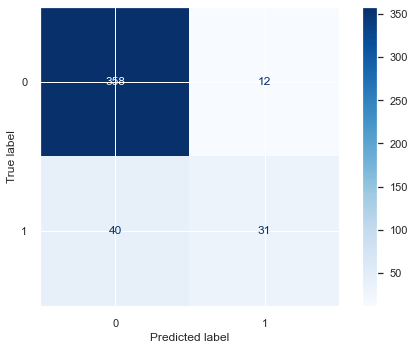

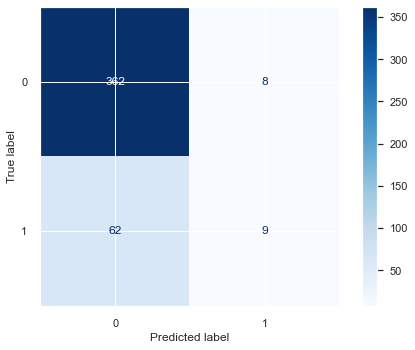

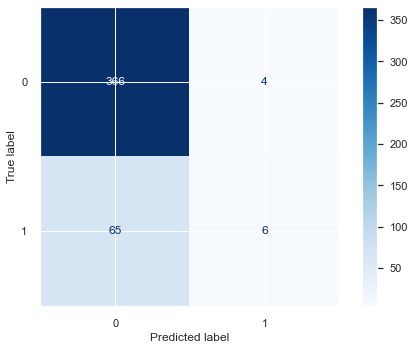

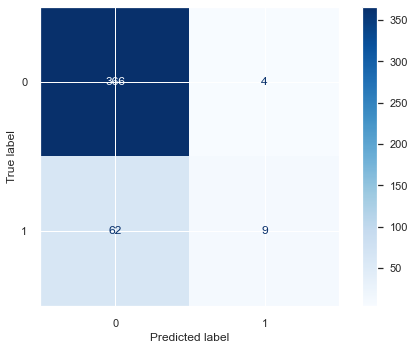

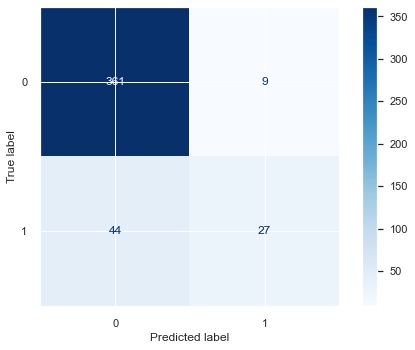

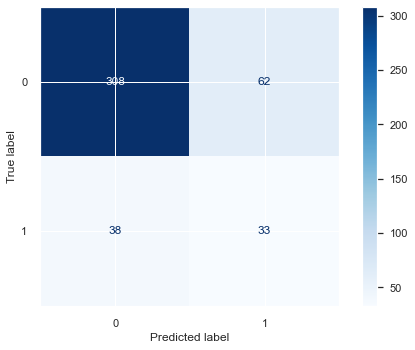

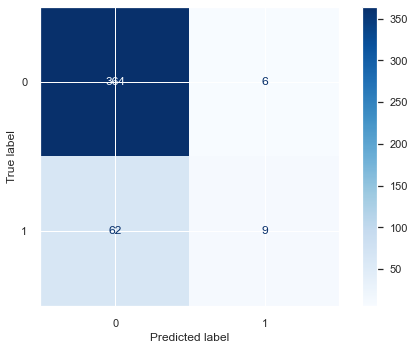

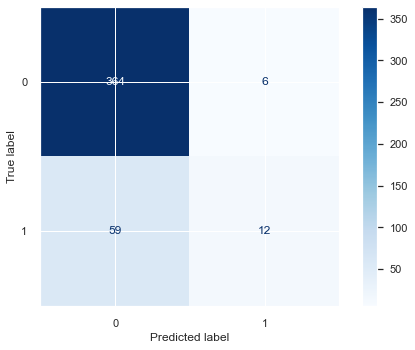

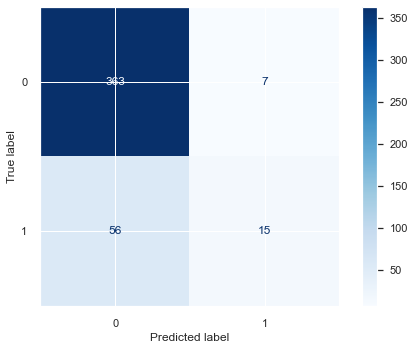

In [96]:
models_comparison = eval_clf(models, X_train, y_train, X_test, y_test)
models_comparison

In [ ]:
plt.subplots(figsize=(8,6))
sns.barplot(x="Model name", y="Recall",data=models_comparison,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Recall Comparison')
plt.show()

FalsePositiveRate = FalsePositives / (FalsePositives + TrueNegatives)

TruePositiveRate = TruePositives / (TruePositives + False Negatives)

ROC Curve: Plot of False Positive Rate (x) vs. True Positive Rate (y)

SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
# Plot ROC curve for all models
def plot_roc_clf(models, X_train, y_train, X_test, y_test):
    
    index = 1
    for i in models:
        y_pred = models[i].fit(X_train, y_train).predict(X_test)
        y_prob = models[i].fit(X_train, y_train).predict_proba(X_test)  
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc_mod = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (i, roc_auc_mod))

        index+=1

    plt.title('ROC Curve comparison')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

In [ ]:
plot_roc_clf(models, X_train, y_train, X_test, y_test)

In [98]:
# Plot Discrimination Threshold
def plot_disc_threshold(models, X_train, y_train, X_test, y_test):

    fig, ax = plt.subplots(figsize=(6,6))
    index = 1
    for i in models:
        pr_viz = DiscriminationThreshold(models[i])
        pr_viz.fit(X_train, y_train)
        pr_viz.poof()

        index+=1

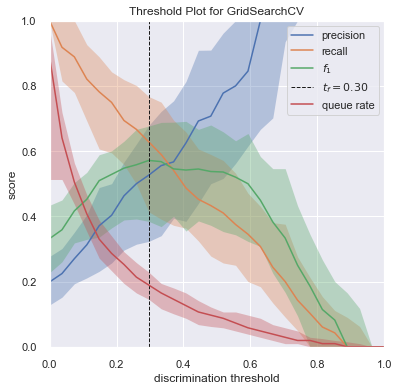

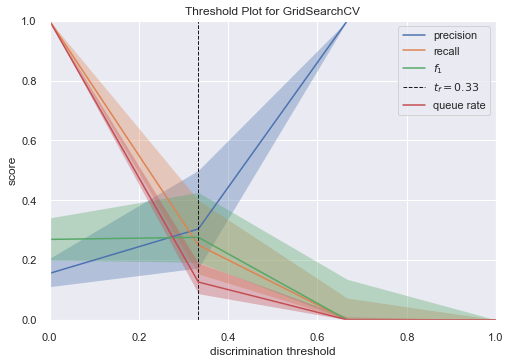

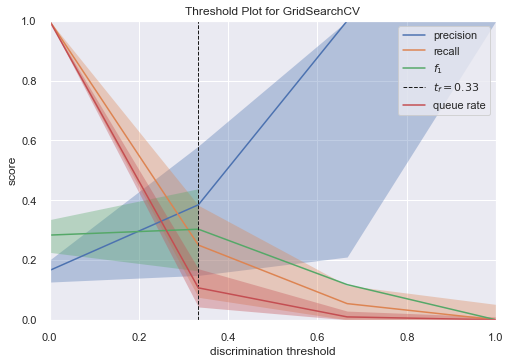

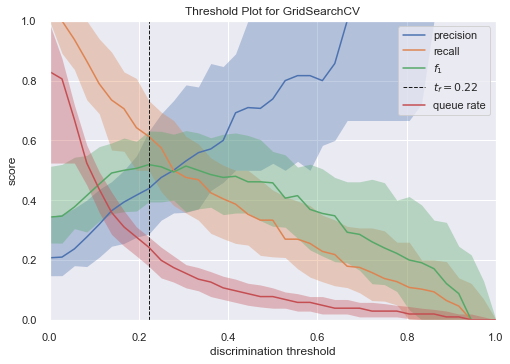

KeyboardInterrupt: 

In [99]:
#plot_disc_threshold(models, X_train, y_train, X_test, y_test)

Precision = TruePositives / (TruePositives + FalsePositives)

Recall = TruePositives / (TruePositives + FalseNegatives)

Precision Recall Curve: Plot of Recall (x) vs Precision (y)
    
SKLEARN: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html 

In [ ]:
# Plot Precision Recall curve for all models
def plot_prc_clf(models, X_train, y_train, X_test, y_test):
    
    index = 1
    
    for i in models:
        y_pred = models[i].fit(X_train, y_train).predict(X_test)
        y_prob = models[i].fit(X_train, y_train).predict_proba(X_test)  

        prob_pred = np.array([y_prob[i, 1 if c else 0]
                         for i, c in enumerate(y_pred)])

        precisions, recalls, thresholds = precision_recall_curve(y_test, prob_pred)
        
        plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
        plt.plot(thresholds, recalls[:-1],    "y--", label="Recall")
        plt.title('Precision & Recall versus the decision threshold \n %s' %i)
        plt.xlabel('Threshold') 
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        
        plt.plot(recalls, precisions, color='green')
        plt.title('Precision Recall Curve \n %s' %i)
        plt.xlabel('Recall') 
        plt.ylabel('Precision')
        plt.show()
        
        index+=1


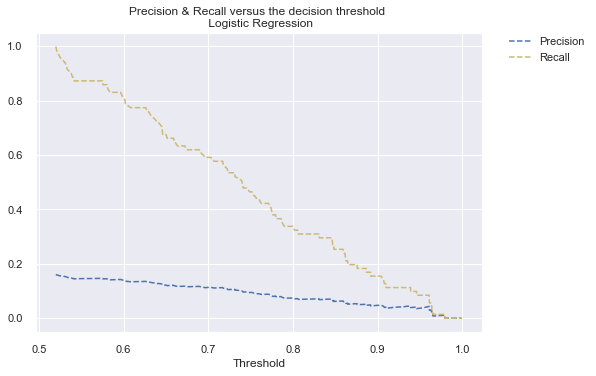

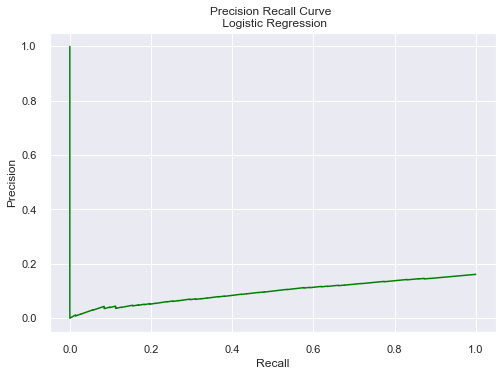

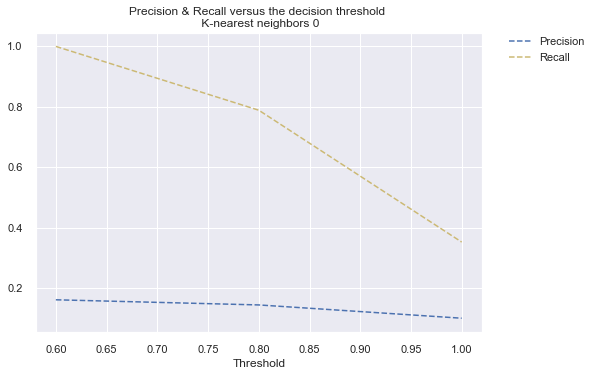

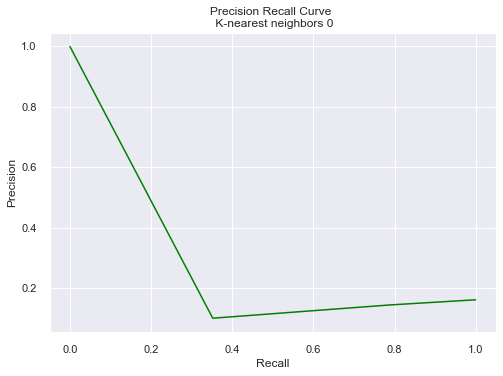

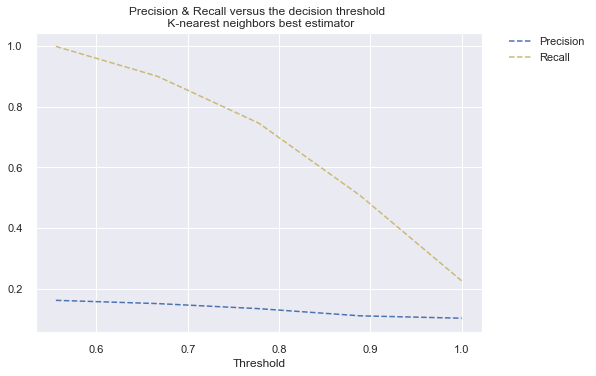

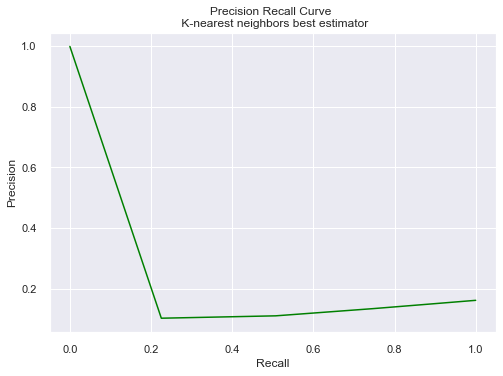

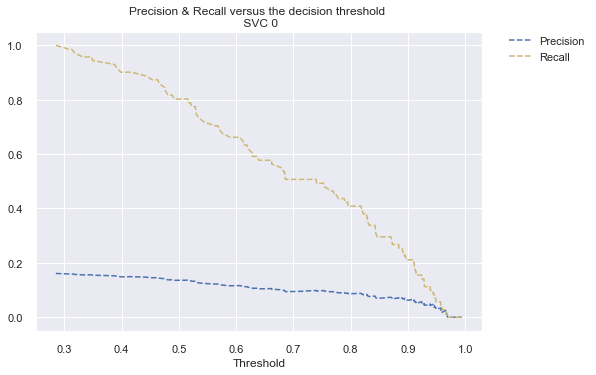

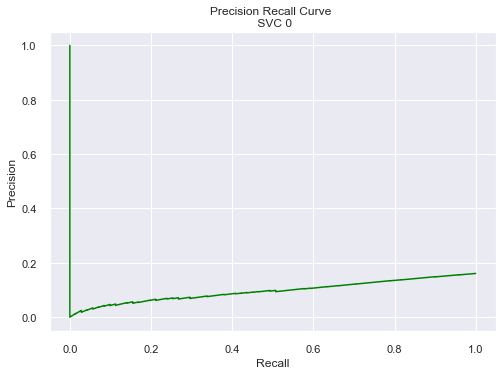

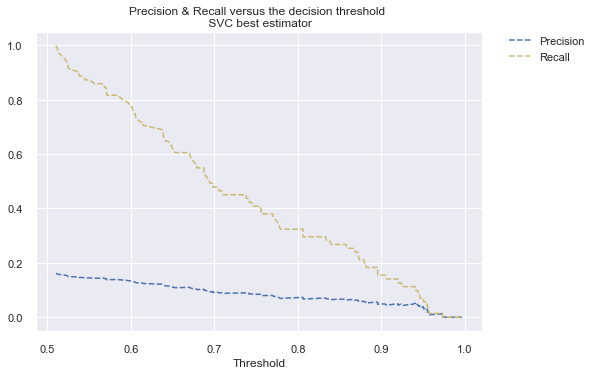

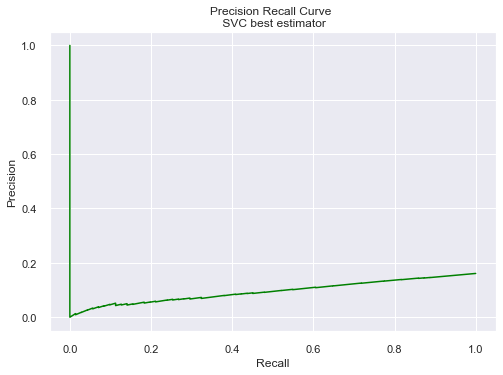

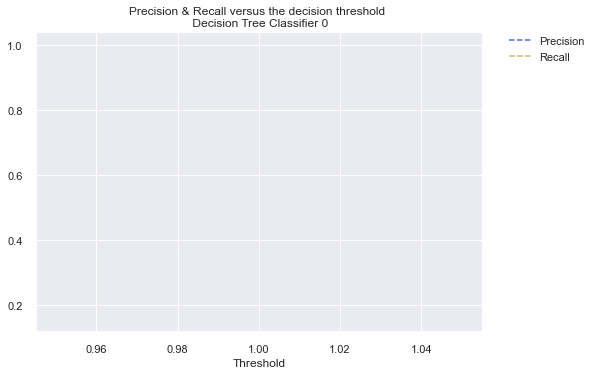

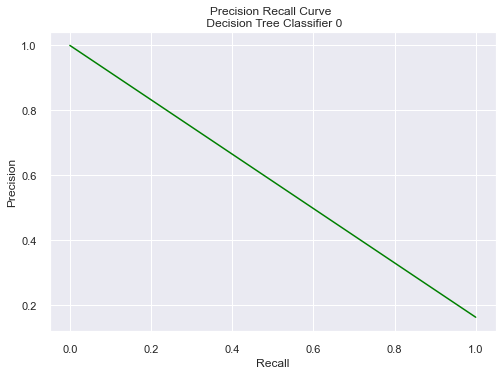

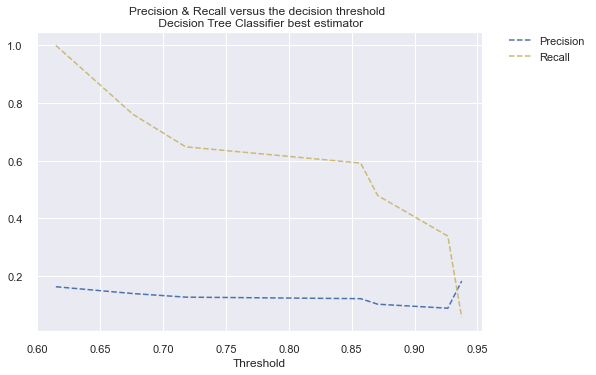

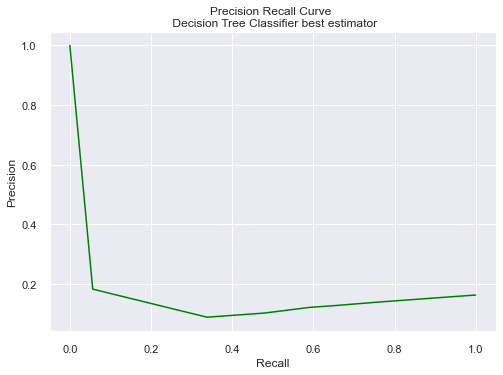

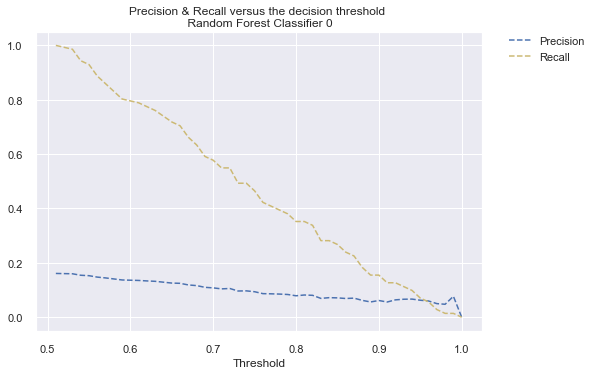

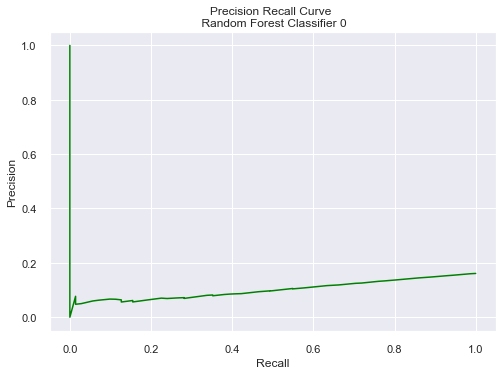

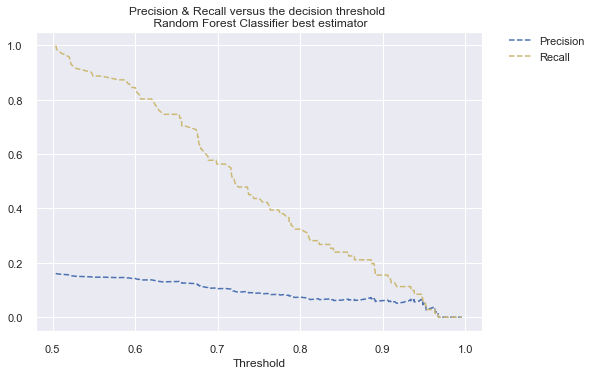

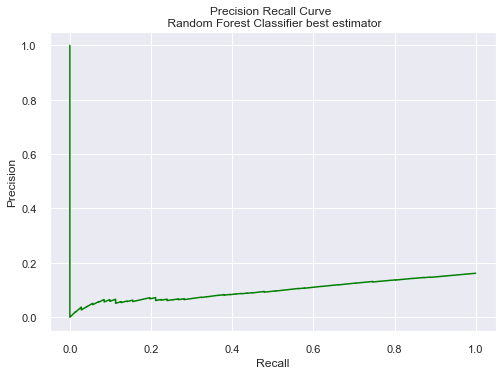

In [106]:
plot_prc_clf(models, X_train, y_train, X_test, y_test)